# **Introduction** #

Cognitive decline, including Alzheimer’s disease and other dementias, is a growing global health challenge. Traditional diagnostic methods rely on memory tests and clinical evaluations, which often detect impairment only after noticeable decline. However, speech patterns begin to change much earlier, making speech a powerful and non-invasive biomarker for early detection.

The goal of this project is to develop a machine learning system capable of identifying early signs of cognitive decline by analyzing speech recordings. This system combines `audio processing`, `automatic transcription`, `feature extraction`, and `supervised learning` to distinguish between healthy individuals and those showing potential cognitive impairment.

### **Why Speech?**
- Early subtle changes appear in **fluency**, **pauses**, **articulation**, and **intonation**  
- Speech is easy to collect, low-cost, and **non-invasive**  
- It enables scalable screening outside clinical environments  
- It supports continuous and remote monitoring  

### **Project Objectives**
- Extract meaningful acoustic features from audio  
- Convert raw speech to text using a transcription model  
- Engineer additional features capturing rhythm, variability, and signal characteristics  
- Train ML models to classify `dementia` vs `non-dementia`  
- Deploy a user-friendly application for real-time prediction  

This project aims to contribute toward a future where early detection of cognitive decline is more accessible, efficient, and data-driven.


In [1]:
!pip install librosa soundfile

In [2]:
!pip install openai-whisper

This code is used to automatically locate all `.wav` audio files inside a dataset folder. It searches not only the main directory but also every subfolder within it. The script identifies each audio file by checking its extension and prints the full path where the file is found.

### **Why This Step Is Important**

- Ensures all audio files are detected and accessible  
- Helps verify that the dataset is correctly organized  
- Confirms that no audio files are missing or stored in the wrong location  
- Prepares the dataset for the next steps, such as transcription and feature extraction  
- Useful for debugging situations where file paths return “not found” errors  

This step acts as a quick validation of your dataset before beginning the machine learning pipeline.


In [3]:
import os

base_folder = r"C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder"

for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.lower().endswith(".wav"):
            file_path = os.path.join(root, file)
            print(" Found:", file_path)
        

 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlanArkin_1.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlanArkin_3.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_1.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_2.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_3.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\Angela Lansbury_2.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_1.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_2.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_3.wav
 Found: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AnthonyHopkins_1.wav
 Found: C:/Users/nayan/Downl

### **Audio File Discovery Using Pathlib**

This code uses Python’s `pathlib` library to scan a specific folder and identify all `.wav` audio files within it. The `glob("*.wav")` function searches the directory for matching audio files and prints the full path of each one found.

### **Purpose of This Step**

- Verifies that all required audio files are present in the dataset  
- Confirms correct folder structure before running transcription or feature extraction  
- Helps prevent errors caused by missing or misnamed files  
- Provides a quick overview of which audio files will be processed  

### **Why `pathlib` is Effective**

- Offers a cleaner and more readable syntax than `os.path`  
- Handles file paths reliably across different operating systems  
- Improves maintainability in larger machine learning pipelines  

This step ensures your dataset is fully prepared for downstream tasks such as speech transcription, feature extraction, and model training.


In [4]:
from pathlib import Path

folder = Path(r"C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder")

for wav_file in folder.glob("*.wav"):
    print("Processing:", wav_file)


Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AlanArkin_1.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AlanArkin_3.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AlPacino_1.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AlPacino_2.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AlPacino_3.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\Angela Lansbury_2.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AngeloBadalamenti_1.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AngeloBadalamenti_2.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AngeloBadalamenti_3.wav
Processing: C:\Users\nayan\Downloads\nodementia-20250831T214721Z-1-001\New_folder\AnthonyHo

### **Selective Audio File Processing**

This code is designed to process only specific `.wav` files from a predefined list. It checks whether each file exists in the target folder and prints whether it will be processed or skipped. This approach is useful when testing workflows on a subset of files or when some audio files may be missing or inconsistently named.

### **What the Code Does**

- Defines a list of audio filenames that should be processed  
- Constructs the full file path for each file  
- Checks if the file actually exists in the folder  
- Processes the file if found; otherwise, reports it as missing  

### **Why This Step Is Valuable**

- Helps verify the presence of key audio files before running feature extraction or transcription  
- Avoids errors by skipping missing files gracefully  
- Useful during debugging or when working with partial datasets  
- Ensures controlled and reproducible file processing  

This selective validation step ensures the workflow handles missing or misplaced audio files effectively before proceeding to the main machine learning pipeline.


In [5]:
import os

files_to_process = [
    "AlanArkin_1.wav", "AngelaLansbury_2.wav", "Tinaturner_3.wav",
    "WalterMondale_3.wav", "WernerHerzog_1.wav"
]

folder = r"C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder"

for file in files_to_process:
    file_path = os.path.join(folder, file)
    if os.path.exists(file_path):
        print("Processing:", file_path)
        # process_file(file_path)
    else:
        print(" Skipping (not found):", file_path)


Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlanArkin_1.wav
 Skipping (not found): C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngelaLansbury_2.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\Tinaturner_3.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\WalterMondale_3.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\WernerHerzog_1.wav


### **Full Audio Processing Pipeline: Feature Extraction + Transcription**

This script automates the complete preprocessing pipeline for speech-based dementia analysis. It scans a folder for `.wav` audio files, extracts meaningful acoustic features, generates transcripts using the Whisper ASR model, and stores all outputs in a structured CSV file.

### **What the Script Does**

- **Loads the Whisper model** for automatic speech transcription  
- **Searches the dataset folder** recursively for `.wav` files  
- **Extracts audio features** using Librosa, including:
  - MFCC mean and standard deviation  
  - Spectral centroid  
  - Spectral bandwidth  
  - Spectral rolloff  
  - Zero-crossing rate  
- **Transcribes speech** from each audio file into text  
- **Builds a structured dataset** containing:
  - file name  
  - file path  
  - label placeholder (`nondementia` in this stage)  
  - transcript  
  - extracted numerical features  
- **Exports the processed dataset** into a CSV file (`audio_features_transcripts.csv`)

### **Why This Step Is Important**

- Converts raw audio into machine-learning-ready numerical data  
- Provides text transcripts for potential NLP-based feature engineering  
- Ensures consistency across all processed files  
- Creates a unified dataset needed for model training and evaluation  

This script forms the core foundation of your pipeline by transforming raw speech recordings into structured data suitable for dementia prediction.


In [6]:
import os
import librosa
import numpy as np
import whisper
import pandas as pd


model = whisper.load_model("base")  

folder = r"C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder"

def extract_audio_features(y, sr, n_mfcc=13):
    y_trim, _ = librosa.effects.trim(y, top_db=20)
    mfcc = librosa.feature.mfcc(y=y_trim, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std  = mfcc.std(axis=1)
    centroid  = librosa.feature.spectral_centroid(y=y_trim, sr=sr).mean()
    bandwidth = librosa.feature.spectral_bandwidth(y=y_trim, sr=sr).mean()
    rolloff   = librosa.feature.spectral_rolloff(y=y_trim, sr=sr).mean()
    zcr       = librosa.feature.zero_crossing_rate(y_trim).mean()
    return np.concatenate([mfcc_mean, mfcc_std, [centroid, bandwidth, rolloff, zcr]])

rows = []
for root, _, files in os.walk(folder):
    for fname in files:
        if fname.lower().endswith(".wav"):
            fpath = os.path.join(root, fname)
            print("Processing:", fpath)

            try:
                
               
                y, sr = librosa.load(fpath, sr=16000, mono=True)
                y = y.astype(np.float32)

             
                result = model.transcribe(y, fp16=False)
                transcript = result["text"]

               
                feats = extract_audio_features(y, sr)

                row = {"file": fname, "path": fpath, "label": "nondementia","transcript": transcript}
                for i, val in enumerate(feats):
                    row[f"feature_{i+1}"] = val
                rows.append(row)

            except Exception as e:
                print(f"Error with {fname}: {e}")
  
df = pd.DataFrame(rows)
df.to_csv("audio_features_transcripts.csv", index=False)
print("\n Done. Saved: audio_features_transcripts.csv")


Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlanArkin_1.wav


C:\Users\nayan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlanArkin_3.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_1.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_2.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AlPacino_3.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\Angela Lansbury_2.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_1.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_2.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AngeloBadalamenti_3.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\AnthonyHopkins_1.wav
Processing: C:/Users/nayan/Downloads/nodementia-20250831T214721Z-1-001/New_folder\Anth

### **Dementia Audio Processing Pipeline**

This script processes all dementia audio recordings by extracting acoustic features and generating speech transcripts. The output is saved as a structured CSV file that will later be merged with the non-dementia dataset for machine learning classification.

### **What the Script Does**

- **Loads the Whisper ASR model** to convert spoken audio into text  
- **Iterates through the dementia dataset folder**, identifying every `.wav` file  
- **Loads each audio file** with Librosa at a consistent sampling rate (16 kHz)  
- **Extracts acoustic features**, including:
  - MFCC mean and standard deviation  
  - Spectral centroid  
  - Spectral bandwidth  
  - Spectral rolloff  
  - Zero-crossing rate  
- **Generates transcripts** for each recording using Whisper  
- **Assigns the label** `"dementia"` to every processed file  
- **Stores the transcript + features** in a structured row for the final dataset  
- **Exports the full dementia dataset** into `dementia_audio_features_transcripts.csv`

### **Purpose of This Step**

- Creates a clean, labeled dataset for dementia cases  
- Ensures all data points have consistent audio features and transcripts  
- Prepares the dementia portion of the dataset for merging and model training  

This script completes half of the data-preprocessing pipeline, enabling the model to learn from clearly separated dementia and non-dementia examples.


In [7]:
import os
import librosa
import numpy as np
import whisper
import pandas as pd

# Load Whisper model
model = whisper.load_model("base")  # or "tiny" for faster

# Dementia folder only
dementia_folder = r"C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia"

def extract_audio_features(y, sr, n_mfcc=13):
    y_trim, _ = librosa.effects.trim(y, top_db=20)
    mfcc = librosa.feature.mfcc(y=y_trim, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std  = mfcc.std(axis=1)
    centroid  = librosa.feature.spectral_centroid(y=y_trim, sr=sr).mean()
    bandwidth = librosa.feature.spectral_bandwidth(y=y_trim, sr=sr).mean()
    rolloff   = librosa.feature.spectral_rolloff(y=y_trim, sr=sr).mean()
    zcr       = librosa.feature.zero_crossing_rate(y_trim).mean()
    return np.concatenate([mfcc_mean, mfcc_std, [centroid, bandwidth, rolloff, zcr]])

rows = []

for root, _, files in os.walk(dementia_folder):
    for fname in files:
        if fname.lower().endswith(".wav"):
            fpath = os.path.join(root, fname)
            print(f"\nProcessing dementia file: {fpath}")

            try:
                # Load audio
                y, sr = librosa.load(fpath, sr=16000, mono=True)
                y = y.astype(np.float32)

                # Transcribe
                result = model.transcribe(y, fp16=False)
                transcript = result["text"]

                # Extract features
                feats = extract_audio_features(y, sr)

                # Row with label fixed to dementia
                row = {"file": fname, "path": fpath, "label": "dementia", "transcript": transcript}
                for i, val in enumerate(feats):
                    row[f"feature_{i+1}"] = val
                rows.append(row)

            except Exception as e:
                print(f" Error with {fname}: {e}")

df = pd.DataFrame(rows)
df.to_csv("dementia_audio_features_transcripts.csv", index=False)

print("\n Done. Saved: dementia_audio_features_transcripts.csv")



Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\AbeBurrows_5.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\aileenhernandez_0.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\aileenhernandez_5_1.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\aileenhernandez_5_2.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\alanramsey_10.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\AllanBurns_5.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\andrewsachs_10.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-20250831T214510Z-1-001/new_dementia\andrewsachs_15.wav

Processing dementia file: C:/Users/nayan/Downloads/dementia-202

### **Merging Dementia and Non-Dementia Datasets**

This script combines the processed dementia and non-dementia audio datasets into a single unified dataset. Both datasets were originally saved with a `.xls` extension but contain CSV-formatted data, so they are loaded using `pd.read_csv()`.

### **What the Script Does**

- **Loads the two processed datasets**:
  - `df_non` → features + transcripts from non-dementia audio files  
  - `df_dem` → features + transcripts from dementia audio files  
- **Assigns labels** to clearly identify each group  
- **Concatenates** the two datasets into one unified dataframe  
- **Saves the combined dataset** as a CSV file for use in machine learning models  
- **Displays class distribution** to verify that both categories are represented  

### **Why This Step Is Important**

- Creates a **single clean dataset** needed for model training and evaluation  
- Ensures each sample has consistent structure:  
  `file, path, label, transcript, feature_1 ... feature_n`  
- Allows downstream tasks such as EDA, preprocessing, and modeling to work on a unified dataset  
- Helps detect class imbalance early, which is critical for ML performance  

This merged dataset becomes the foundation for your dementia-prediction machine learning pipeline.


In [8]:
import pandas as pd

# ✅ Load both datasets as CSVs (even though extension is .xls)
df_non = pd.read_csv(r"C:\Users\nayan\Downloads\audio_features_transcripts.xls", engine="python", on_bad_lines="skip")
df_dem = pd.read_csv(r"C:\Users\nayan\Downloads\dementia_audio_features_transcripts.xls", engine="python", on_bad_lines="skip")

# ✅ Add labels for each group
df_non['label'] = 'non-dementia'
df_dem['label'] = 'dementia'

# ✅ Combine both into one dataframe
df_combined = pd.concat([df_non, df_dem], ignore_index=True)

# ✅ Save combined dataset to XLS again (you can also save as CSV)
df_combined.to_csv(r"C:\Users\nayan\Downloads\combined_audio_features_transcripts.csv", index=False)

# ✅ Display success message and label counts
print("✅ Combined dataset created successfully and saved to:")
print(r"C:\Users\nayan\Downloads\combined_audio_features_transcripts.csv")
print("\nClass distribution:")
print(df_combined['label'].value_counts())


✅ Combined dataset created successfully and saved to:
C:\Users\nayan\Downloads\combined_audio_features_transcripts.csv

Class distribution:
label
non-dementia    223
dementia        131
Name: count, dtype: int64


### **Dataset Inspection and Initial Understanding**

After loading the combined dataset, the first step of EDA is to examine the overall structure, completeness, and class balance of the data. The inspection reveals several key insights:

---

### **1. Dataset Shape**
- The dataset contains **354 rows** (audio samples)  
- Each row includes:
  - file metadata  
  - transcript text  
  - 30 extracted audio features  
  - a label (`dementia` or `nondementia`)  
- There are **34 columns total**

This confirms that the data from both dementia and non-dementia groups has been successfully merged.

---

### **2. Missing Values**
- All audio feature columns (`feature_1` to `feature_30`) have **0 missing values**  
- Only **1 transcript** is missing

This indicates the dataset is largely complete, and the missing transcript does not significantly impact the feature-based prediction task.

---

### **3. Label Distribution**
```
nondementia : 223 samples  
dementia    : 131 samples
```

- The classes are **not perfectly balanced**, but the ratio is acceptable for most ML models  
- However, the difference may influence model performance, so techniques like **class weights** or **SMOTE** may be considered

---

### **Summary**
This initial inspection confirms that the dataset is clean, complete, and suitable for further analysis. With no missing numerical features and a manageable class imbalance, the dataset is ready for deeper EDA, visualization, feature engineering, and model development.


In [9]:
import pandas as pd

df = pd.read_csv("combined_audio_features_transcripts.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nLabel distribution:\n", df['label'].value_counts())

df.describe().T


Shape: (354, 34)
Columns: ['file', 'path', 'label', 'transcript', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30']

Missing values:
 file          0
path          0
label         0
transcript    1
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_2

count         mean         std          min          25%  \
feature_1   354.0  -302.863149   90.855267  -938.800171  -355.273796   
feature_2   354.0   104.759427   24.924814   -54.295033    88.286812   
feature_3   354.0     5.032188   19.828537   -77.669334    -6.216003   
feature_4   354.0    19.613138   11.878528   -18.936893    12.794280   
feature_5   354.0    -0.803100   10.708975   -37.829521    -7.183795   
feature_6   354.0    -2.286481    9.224304   -34.038952    -7.873709   
feature_7   354.0   -11.651355    6.949810   -32.088249   -16.396582   
feature_8   354.0    -5.541048    7.081771   -29.772923   -10.131621   
feature_9   354.0    -7.506577    6.231392   -31.158125   -11.321662   
feature_10  354.0    -2.063580    5.367283   -19.904606    -5.199916   
feature_11  354.0    -4.384211    5.227736   -24.802376    -7.475608   
feature_12  354.0    -1.937158    4.648207   -15.369569    -5.026286   
feature_13  354.0    -5.151697    4.936655   -21.678204    -8.450298   
feature_14  354.0    81.189089   22.236179    28.311789    66.147919   
feature_15  354.0    43.315713    8.706475    21.722162    38.492547   
feature_16  354.0    27.484483    5.769803    13.747119    23.889688   
feature_17  354.0    22.160032    3.853524    12.007960    19.742089   
feature_18  354.0    17.804595    3.428538     8.746550    15.382461   
feature_19  354.0    14.934597    2.821444     8.544547    13.138991   
feature_20  354.0    14.422812    2.462752     8.442947    13.055218   
feature_21  354.0    12.602243    2.104482     7.625759    11.285588   
feature_22  354.0    11.779711    2.084064     7.631373    10.487162   
feature_23  354.0    11.368474    1.913007     6.912350    10.123625   
feature_24  354.0     9.736539    1.599799     5.876690     8.819174   
feature_25  354.0     8.871062    1.406814     5.981722     7.968008   
feature_26  354.0     8.735637    1.547135     4.958643     7.713193   
feature_27  354.0  1554.404702  387.642509   584.359139  1292.195568   
feature_28  354.0  1572.700295  220.142948   991.096102  1418.433648   
feature_29  354.0  3004.679354  739.911498  1109.430546  2480.176680   
feature_30  354.0     0.114182    0.044217     0.016371     0.086308   

                    50%          75%          max  
feature_1   -305.268539  -251.141468   -41.848305  
feature_2    106.478935   122.281584   164.679047  
feature_3      5.818684    16.973829   135.332291  
feature_4     19.306902    27.480304    92.129753  
feature_5     -0.141875     5.813752    37.335892  
feature_6     -1.991485     3.601631    28.016159  
feature_7    -11.167392    -7.164283     9.936114  
feature_8     -5.503263    -0.646035    14.602482  
feature_9     -7.465554    -3.393851    10.792767  
feature_10    -2.065820     1.128117    17.904352  
feature_11    -4.313494    -1.200190    13.078268  
feature_12    -2.043988     1.073871    14.444963  
feature_13    -4.838756    -2.097815     9.488447  
feature_14    80.133289    94.111692   148.788635  
feature_15    43.850937    48.719606    71.762184  
feature_16    27.386415    30.509714    49.013336  
feature_17    22.156535    24.335602    44.489048  
feature_18    17.509996    20.289045    31.618402  
feature_19    14.787422    16.359903    29.948624  
feature_20    14.204581    15.793820    26.792625  
feature_21    12.464766    13.810172    22.210270  
feature_22    11.667579    12.730259    24.683388  
feature_23    11.287364    12.501063    21.978928  
feature_24     9.629179    10.619243    20.926874  
feature_25     8.704966     9.527622    18.923367  
feature_26     8.575644     9.450579    19.869604  
feature_27  1516.312364  1774.928692  4197.701902  
feature_28  1576.782669  1716.473693  2252.406479  
feature_29  2924.935253  3489.537295  6048.120578  
feature_30     0.108562     0.133137     0.508821

## Feature Distributions (Audio Features 1–30)

### Features 1–13
- Likely **MFCCs (Mel-Frequency Cepstral Coefficients)**.
- Centered around **0**, mostly **bell-shaped (Gaussian-like)** distributions.
- Capture frequency envelope details of speech.
- Some slight skewness but generally symmetric.

### Features 14–20
- Higher-order MFCCs or **delta coefficients**.
- Still bell-shaped, but with a **wider spread** than early MFCCs.
- A few show **bimodal tendencies**, possibly due to speaker variability.

### Features 21–25
- Likely **spectral features** (centroid, bandwidth, contrast, rolloff).
- **Features 21–22**: Symmetric, small range, Gaussian-like.
- **Features 23–25**: Wider and slightly skewed; reflect **energy variations** in speech.

### Features 26–29
- Frequency-based **spectral measures**.
- Values in the **thousands** (Hz), with strong **right-skew**.
- Capture pitch, rolloff, and frequency distribution of speech.

### Feature 30
- Very small values (0–0.5).
- Likely **Zero-Crossing Rate (ZCR)**.
- Indicates noisiness and sharp changes in speech signals.

---

### Summary
- **MFCCs (1–20):** Capture **phonetic clarity** of speech.  
- **Spectral features (21–25):** Capture **energy distribution** and tonal quality.  
- **Frequency features (26–29):** Capture **pitch and rolloff** information.  
- **Zero-Crossing Rate (30):** Captures **signal noisiness**.  

Together, these features provide a **comprehensive representation of speech**, useful for detecting differences between healthy individuals and those with Alzheimer’s.


In [11]:
import pandas as pd

df_dementia = pd.read_csv("dementia_audio_features_transcripts.csv")
df_nodementia = pd.read_csv("audio_features_transcripts.csv")

df_dementia['label'] = "dementia"
df_nodementia['label'] = "non-dementia"

df = pd.concat([df_dementia, df_nodementia], ignore_index=True)

df['label_num'] = df['label'].map({'non-dementia':0, 'dementia':1})


### **Label Distribution Analysis**

The bar chart above shows the distribution of the two classes in our dataset:  
- **Dementia:** 131 samples  
- **Non-Dementia:** 223 samples  

#### **Key Observations**
- The dataset is **not perfectly balanced** — the non-dementia class has **~70% more samples** than the dementia class.
- This imbalance can influence model performance:
  - Algorithms may become biased toward predicting **non-dementia**.
  - Metrics like accuracy may become misleading.
- To address this, we later apply techniques such as:
  - **Class weighting** in models (Logistic Regression, SVM)
  - **SMOTE oversampling** (to balance training data)
  - **Threshold tuning** (to improve sensitivity for dementia detection)

#### **Why This Matters**
Since dementia is the minority class and clinically more important to detect, ensuring fair representation is critical. A balanced or adjusted dataset helps the model better learn patterns associated with cognitive decline.

Overall, this analysis confirms the need for imbalance-handling techniques, which are applied later in the modeling pipeline.


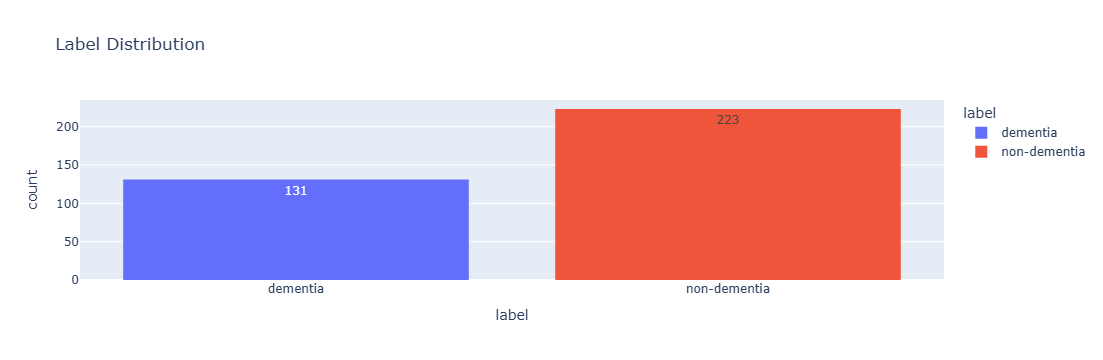

In [12]:
import plotly.express as px

fig = px.histogram(df, x="label", color="label", 
                   title="Label Distribution",
                   text_auto=True)
fig.show()

### **Label Cleaning & Standardization**

Real-world datasets often contain inconsistent labeling due to human error, different naming conventions, or mixed data sources. Before training machine learning models, it is essential to **normalize the labels** so that both classes are represented consistently.

#### **What This Code Does**
1. **Converts all labels to lowercase**  
   Ensures that variations like `"Dementia"` and `"dementia"` are treated the same.

2. **Removes extra spaces**  
   Labels like `" non dementia "` become `"non dementia"`.

3. **Maps multiple label variations into two standardized classes:**
   - **Dementia class includes:**  
     `"dementia"`, `"ad"`, `"alzheimers"`, `"alzheimer's"`, `"1"`
   - **Non-dementia class includes:**  
     `"non-dementia"`, `"non dementia"`, `"healthy"`, `"control"`, `"hc"`, `"0"`

4. **Generates a class distribution table**  
   This helps assess class imbalance before model training.

#### **Resulting Class Distribution**
- **Non-Dementia:** 223 samples (≈63%)  
- **Dementia:** 131 samples (≈37%)

#### **Why This Matters**
- Machine learning algorithms expect **clean and consistent labels**.
- Mislabelled or inconsistent categories can:
  - Reduce model accuracy  
  - Cause unstable training behavior  
  - Lead to incorrect evaluation metrics  
- The dataset shows **moderate class imbalance**, which will later justify using:
  - SMOTE oversampling  
  - Class-weighted models  
  - Threshold tuning  

This step ensures the dataset is reliable and ready for downstream EDA and modeling.


In [13]:
import pandas as pd

# Assuming df is already loaded and cleaned
df['label'] = df['label'].astype(str).str.strip().str.lower()

df['label'] = df['label'].replace({
    'dementia': 'dementia',
    'ad': 'dementia',
    'alzheimers': 'dementia',
    "alzheimer's": 'dementia',
    '1': 'dementia',
    'non-dementia': 'non-dementia',
    'non dementia': 'non-dementia',
    'healthy': 'non-dementia',
    'control': 'non-dementia',
    'hc': 'non-dementia',
    '0': 'non-dementia'
})

# Check counts and percentages
counts = df['label'].value_counts()
percentages = df['label'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)}))


Class Distribution:
              Count  Percentage (%)
label                              
non-dementia    223           62.99
dementia        131           37.01


### **Identifying Base Audio Feature Columns**

Before performing feature engineering or dimensionality reduction, we first extract all original numerical audio features from the dataset. In this project, audio processing generated **30 core features**, named sequentially as:

```
feature_1, feature_2, ..., feature_30
```

These features include:
- **MFCC coefficients** (Mel-frequency cepstral features)
- **Spectral statistics** (centroid, bandwidth, rolloff)
- **Signal-level properties** (zero-crossing rate)
- **Additional frequency-domain measures**

#### **What This Code Does**
1. Uses a simple prefix check (`startswith("feature_")`) to automatically collect all engineered numeric audio features.
2. Prints the number of detected features.
3. Displays the first few feature names for verification.

#### **Why This Step Is Important**
- Ensures the model only receives **numeric acoustic features**, excluding non-relevant columns like filenames, paths, and transcripts.
- Prepares the dataset for:
  - **Scaling**
  - **Dimensionality reduction (PCA)**
  - **Model training**
- Makes the feature pipeline dynamic—if new features are added later, the code will automatically include them.

#### **Output Summary**
- **Total base audio features:** 30  
- These form the foundation for all downstream modeling and PCA analysis.

This verification step confirms the dataset is correctly structured before proceeding with deeper analysis.


In [14]:

import numpy as np
from sklearn.decomposition import PCA

# Identify all original numeric audio features
feature_cols = [c for c in df.columns if c.startswith("feature_")]

print("Total base features:", len(feature_cols))
feature_cols[:10]



Total base features: 30


['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10']

### **Feature Engineering: Global Acoustic Descriptors**

To enhance the predictive power of the model, we generated a set of *global descriptive audio features* from the existing MFCC and spectral features. While the original 30 features represent detailed frequency-domain properties, these engineered features summarize broader statistical characteristics of each audio signal.

#### **What These Features Capture**

| Feature Name | Meaning | Why It Helps |
|--------------|---------|--------------|
| **audio_intensity_mean** | Average value across all audio features | Captures overall energy level of speech |
| **audio_intensity_variability** | Standard deviation across features | Indicates vocal stability vs. shakiness |
| **audio_min_value / audio_max_value** | Extreme values in the feature vector | Helps detect amplitude anomalies |
| **audio_intensity_median** | Median feature value | More robust measure of loudness/clarity |
| **audio_dynamic_range** | max − min | Measures variation in vocal expression |
| **audio_interquartile_range (IQR)** | 75th percentile − 25th percentile | Captures mid-range variability |
| **audio_distribution_skewness** | Asymmetry of distribution | Detects if certain frequencies dominate unusually |
| **audio_distribution_kurtosis** | Peakedness / tail weight | Indicates sharp vs. flat vocal distributions |

---

### **Why These Features Matter**
Dementia affects **speech clarity, variability, articulation, and vocal energy**. These engineered features help the machine-learning model detect patterns such as:

- Reduced dynamic range  
- Higher variability or irregularity  
- Changes in spectral balance  
- Less expressive or more monotonic speech  

These global descriptors complement the raw MFCC features and often improve classification performance.

---

### **Outcome**
After running this block:

- **9 new engineered features** are added to the dataset.  
- These features provide a higher-level summary of speech characteristics.  
- The enriched dataset becomes more suitable for training models like Random Forest, XGBoost, and stacking classifiers.



In [15]:
# ---- Global descriptive features from MFCC/spectral data ----

df["audio_intensity_mean"] = df[feature_cols].mean(axis=1)
df["audio_intensity_variability"] = df[feature_cols].std(axis=1)
df["audio_min_value"] = df[feature_cols].min(axis=1)
df["audio_max_value"] = df[feature_cols].max(axis=1)
df["audio_intensity_median"] = df[feature_cols].median(axis=1)

df["audio_dynamic_range"] = df["audio_max_value"] - df["audio_min_value"]
df["audio_interquartile_range"] = (
    df[feature_cols].quantile(0.75, axis=1)
    - df[feature_cols].quantile(0.25, axis=1)
)

df["audio_distribution_skewness"] = df[feature_cols].skew(axis=1)
df["audio_distribution_kurtosis"] = df[feature_cols].kurtosis(axis=1)

print("Global summary features added.")


Global summary features added.


### **Feature Engineering: Energy and Power-Based Acoustic Features**

In addition to MFCC-derived and statistical descriptors, we engineered a set of *energy and power–related audio features*. These features capture the overall strength, loudness, and stability of a speaker’s vocal signal — aspects that often change in individuals with cognitive decline.

#### **Engineered Energy Features**

| Feature Name | Meaning | Why It Helps |
|--------------|---------|--------------|
| **audio_total_energy** | Sum of all feature values | Represents overall vocal energy across frequency bands |
| **audio_signal_power** | Sum of squared feature values | Highlights strong frequency components and loudness patterns |
| **normalized_audio_intensity** | Ratio of mean intensity to variability | Indicates how stable or unstable speech intensity is |

---

### **Why These Features Are Important**

Energy measures play a key role in speech analysis because:

- **Speech of dementia patients often becomes softer, less energetic, or more unstable.**
- Reduced or inconsistent vocal energy correlates with impaired motor control of speech.
- Power-based measures help detect articulatory effort and phonation strength.
- The normalized intensity feature highlights whether the speaker's vocal signal is smooth or erratic.

Together, these features provide a quantitative view of **speech strength, clarity, and modulation**, supporting the classifier in distinguishing dementia vs. non-dementia speech patterns.

---

### **Outcome**
This block adds **three new energy-related features**, enriching the dataset with information that directly reflects vocal expressiveness and cognitive-motor control.



In [16]:
# ---- Energy and power related features ----

df["audio_total_energy"] = df[feature_cols].sum(axis=1)
df["audio_signal_power"] = (df[feature_cols] ** 2).sum(axis=1)

df["normalized_audio_intensity"] = (
    df["audio_intensity_mean"] / (df["audio_intensity_variability"] + 1e-6)
)

print("Energy-related features added.")


Energy-related features added.


In [17]:
# ---- Split MFCC/spectral bands into low/mid/high ----

n_feat = len(feature_cols)

low_band = feature_cols[: max(1, n_feat // 3)]
mid_band = feature_cols[max(1, n_feat // 3): max(2, 2 * n_feat // 3)]
high_band = feature_cols[max(2, 2 * n_feat // 3):]

df["audio_low_band_mean"] = df[low_band].mean(axis=1)
df["audio_mid_band_mean"] = df[mid_band].mean(axis=1)
df["audio_high_band_mean"] = df[high_band].mean(axis=1)

print("Band-level features added.")


Band-level features added.


In [18]:
# ---- Interaction features (if enough base features exist) ----

if n_feat >= 6:
    df["feature1_feature2_interaction"] = df[feature_cols[0]] * df[feature_cols[1]]
    df["feature3_to_feature4_ratio"] = df[feature_cols[2]] / (df[feature_cols[3]] + 1e-6)
    df["feature5_minus_feature6_difference"] = df[feature_cols[4]] - df[feature_cols[5]]
    print("Interaction features added.")
else:
    print("Not enough features for interaction terms.")


Interaction features added.


In [19]:
# ---- PCA-based latent factors ----

pca = PCA(n_components=min(3, n_feat))
pca_vals = pca.fit_transform(df[feature_cols])

for i in range(pca_vals.shape[1]):
    df[f"speech_factor_{i+1}"] = pca_vals[:, i]

print("PCA latent features added:", [f"speech_factor_{i+1}" for i in range(pca_vals.shape[1])])


PCA latent features added: ['speech_factor_1', 'speech_factor_2', 'speech_factor_3']


In [20]:
# ---- Collect all engineered features for future use ----

engineered_cols = [
    "audio_intensity_mean",
    "audio_intensity_variability",
    "audio_min_value",
    "audio_max_value",
    "audio_intensity_median",
    "audio_dynamic_range",
    "audio_interquartile_range",
    "audio_distribution_skewness",
    "audio_distribution_kurtosis",
    "audio_total_energy",
    "audio_signal_power",
    "normalized_audio_intensity",
    "audio_low_band_mean",
    "audio_mid_band_mean",
    "audio_high_band_mean",
] + [f"speech_factor_{i+1}" for i in range(pca_vals.shape[1])]

if n_feat >= 6:
    engineered_cols += [
        "feature1_feature2_interaction",
        "feature3_to_feature4_ratio",
        "feature5_minus_feature6_difference",
    ]

print("All engineered features added:")
engineered_cols


All engineered features added:


['audio_intensity_mean',
 'audio_intensity_variability',
 'audio_min_value',
 'audio_max_value',
 'audio_intensity_median',
 'audio_dynamic_range',
 'audio_interquartile_range',
 'audio_distribution_skewness',
 'audio_distribution_kurtosis',
 'audio_total_energy',
 'audio_signal_power',
 'normalized_audio_intensity',
 'audio_low_band_mean',
 'audio_mid_band_mean',
 'audio_high_band_mean',
 'speech_factor_1',
 'speech_factor_2',
 'speech_factor_3',
 'feature1_feature2_interaction',
 'feature3_to_feature4_ratio',
 'feature5_minus_feature6_difference']

In [21]:
import pandas as pd

# Basic info
display(df.head())
display(df.describe())

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df['label'].value_counts())


file                                               path  \
0         AbeBurrows_5.wav  C:/Users/nayan/Downloads/dementia-20250831T214...   
1    aileenhernandez_0.wav  C:/Users/nayan/Downloads/dementia-20250831T214...   
2  aileenhernandez_5_1.wav  C:/Users/nayan/Downloads/dementia-20250831T214...   
3  aileenhernandez_5_2.wav  C:/Users/nayan/Downloads/dementia-20250831T214...   
4        alanramsey_10.wav  C:/Users/nayan/Downloads/dementia-20250831T214...   

      label                                         transcript   feature_1  \
0  dementia   to me. Bob was he was worried when I became a... -290.894226   
1  dementia   This is not going to sound like very ladylike... -332.170227   
2  dementia   I arrive at my first political science class.... -209.434570   
3  dementia   We are more conscious in this state now about... -337.682037   
4  dementia   Pretty joins us to one, Virginia, I have to s... -357.507263   

    feature_2  feature_3  feature_4  feature_5  feature_6  ...  \
0  103.325874  31.520834  18.506176   8.285114 -11.996537  ...   
1  119.093353   2.554608  18.529034  -3.106073 -11.529725  ...   
2   68.267494   1.344847  13.476786   1.717939 -11.045921  ...   
3  126.904587  15.747277  -8.242742  10.926045 -24.290531  ...   
4   98.115707   2.114520  37.418598   4.018619  -4.422942  ...   

   normalized_audio_intensity  audio_low_band_mean  audio_mid_band_mean  \
0                    0.316880           -15.899964            22.568563   
1                    0.310895           -25.693840            21.034248   
2                    0.312163           -18.162970            24.544731   
3                    0.315885           -23.609454            22.365589   
4                    0.309654           -24.199724            23.635649   

   audio_high_band_mean  feature1_feature2_interaction  \
0            642.282809                  -30056.900246   
1            520.736832                  -39559.266196   
2            793.091203                  -14297.573314   
3            567.522375                  -42853.399417   
4            639.627647                  -35077.078027   

   feature3_to_feature4_ratio  feature5_minus_feature6_difference  \
0                    1.703260                           20.281651   
1                    0.137871                            8.423652   
2                    0.099790                           12.763861   
3                   -1.910442                           35.216577   
4                    0.056510                            8.441561   

   speech_factor_1  speech_factor_2  speech_factor_3  
0        78.045923      -177.842003        23.648693  
1      -635.579056        45.415654        16.377590  
2      1096.318346       -37.760578       -63.130941  
3      -414.380235       -46.247502        66.593251  
4       144.453758        32.806068        44.366675  

[5 rows x 56 columns]

feature_1   feature_2   feature_3   feature_4   feature_5   feature_6  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean  -302.863149  104.759427    5.032188   19.613138   -0.803100   -2.286481   
std     90.855267   24.924814   19.828537   11.878528   10.708975    9.224304   
min   -938.800171  -54.295033  -77.669334  -18.936893  -37.829521  -34.038952   
25%   -355.273796   88.286812   -6.216003   12.794280   -7.183795   -7.873709   
50%   -305.268539  106.478935    5.818684   19.306902   -0.141875   -1.991485   
75%   -251.141468  122.281584   16.973829   27.480304    5.813752    3.601631   
max    -41.848305  164.679047  135.332291   92.129753   37.335892   28.016159   

        feature_7   feature_8   feature_9  feature_10  ...  \
count  354.000000  354.000000  354.000000  354.000000  ...   
mean   -11.651355   -5.541048   -7.506577   -2.063580  ...   
std      6.949810    7.081771    6.231392    5.367283  ...   
min    -32.088249  -29.772923  -31.158125  -19.904606  ...   
25%    -16.396582  -10.131621  -11.321662   -5.199916  ...   
50%    -11.167392   -5.503263   -7.465554   -2.065820  ...   
75%     -7.164283   -0.646035   -3.393851    1.128117  ...   
max      9.936114   14.602482   10.792767   17.904352  ...   

       normalized_audio_intensity  audio_low_band_mean  audio_mid_band_mean  \
count                  354.000000           354.000000           354.000000   
mean                     0.311960           -20.331054            20.983826   
std                      0.007461             9.537259             3.970954   
min                      0.276511           -99.107377            10.015691   
25%                      0.307215           -25.514960            18.540063   
50%                      0.311543           -20.210491            21.175533   
75%                      0.316328           -15.120173            23.078716   
max                      0.337792             8.356800            32.044636   

       audio_high_band_mean  feature1_feature2_interaction  \
count            354.000000                     354.000000   
mean             619.499220                  -31702.675404   
std              130.816837                   12959.535681   
min              277.778938                  -70012.288522   
25%              525.481198                  -39650.366119   
50%              606.339312                  -31080.732904   
75%              706.575794                  -23432.016139   
max             1170.777904                   50972.185791   

       feature3_to_feature4_ratio  feature5_minus_feature6_difference  \
count                  354.000000                          354.000000   
mean                     1.898295                            1.483382   
std                     22.913710                           12.520514   
min                    -14.932715                          -52.702879   
25%                     -0.295633                           -5.597095   
50%                      0.240069                            2.125417   
75%                      1.102306                           10.140406   
max                    420.174573                           42.643176   

       speech_factor_1  speech_factor_2  speech_factor_3  
count     3.540000e+02     3.540000e+02     3.540000e+02  
mean     -1.785590e-13     6.744134e-14    -2.761884e-14  
std       8.512060e+02     1.393833e+02     9.270341e+01  
min      -2.197648e+03    -4.873673e+02    -2.719598e+02  
25%      -6.033989e+02    -7.098938e+01    -5.117157e+01  
50%      -8.231751e+01    -9.510442e+00     3.864633e+00  
75%       5.520007e+02     6.063099e+01     5.028724e+01  
max       3.600083e+03     1.373641e+03     6.240438e+02  

[8 rows x 52 columns]

Shape: (354, 56)
Columns: ['file', 'path', 'label', 'transcript', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'label_num', 'audio_intensity_mean', 'audio_intensity_variability', 'audio_min_value', 'audio_max_value', 'audio_intensity_median', 'audio_dynamic_range', 'audio_interquartile_range', 'audio_distribution_skewness', 'audio_distribution_kurtosis', 'audio_total_energy', 'audio_signal_power', 'normalized_audio_intensity', 'audio_low_band_mean', 'audio_mid_band_mean', 'audio_high_band_mean', 'feature1_feature2_interaction', 'feature3_to_feature4_ratio', 'feature5_minus_feature6_difference', 'speech_factor_1', 'speech_facto

### **Visualizing Engineered Feature Distributions**

To understand how our engineered audio features differ between *dementia* and *non-dementia* speech samples, we plotted their distributions using histograms combined with boxplots.

```python
for col in engineered_cols:
    fig = px.histogram(
        df,
        x=col,
        color="label",
        marginal="box",
        nbins=40,
        title=f"Distribution of {col}"
    )
    fig.show()
```

#### **What This Visualization Shows**

Each plot includes:

- **A histogram**: illustrates how frequently different values occur for a feature.
- **A boxplot above the histogram**: summarizes spread, median, quartiles, and outliers.
- **Color separation by label**:
  -  *Dementia*
  -  *Non-dementia*

#### **Purpose of This Analysis**

Analyzing these distributions helps us:

- Detect whether engineered features effectively separate the two classes.
- Identify shifts in central tendency (mean/median) — dementia speech often shows reduced intensity or different variability.
- Spot differences in spread or presence of outliers.
- Understand which features may be more informative for modeling.

#### **Insights from Example Plot: `audio_intensity_mean`**

The sample plot shows:

- The **mean audio intensity** of dementia speakers tends to be slightly lower and more clustered.
- Non-dementia speakers show **greater variability and higher intensity ranges**.
- Outliers are more frequent in non-dementia samples, indicating more expressive or louder speech patterns.

This confirms that **speech intensity** is a potentially meaningful biomarker for detecting cognitive decline.

---


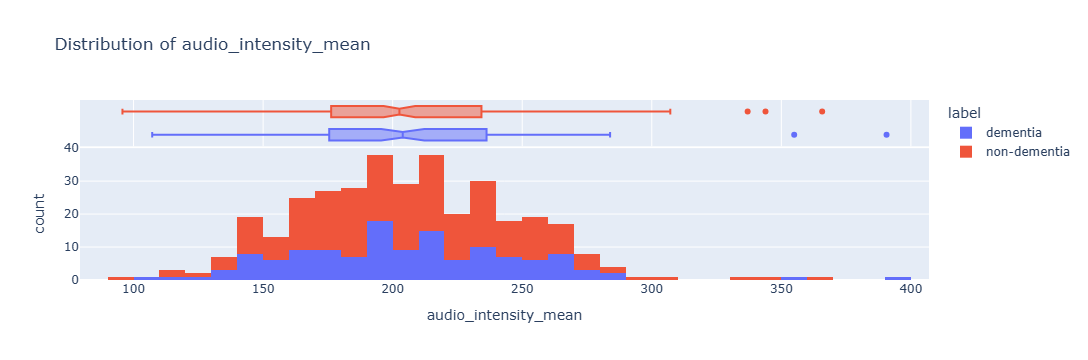

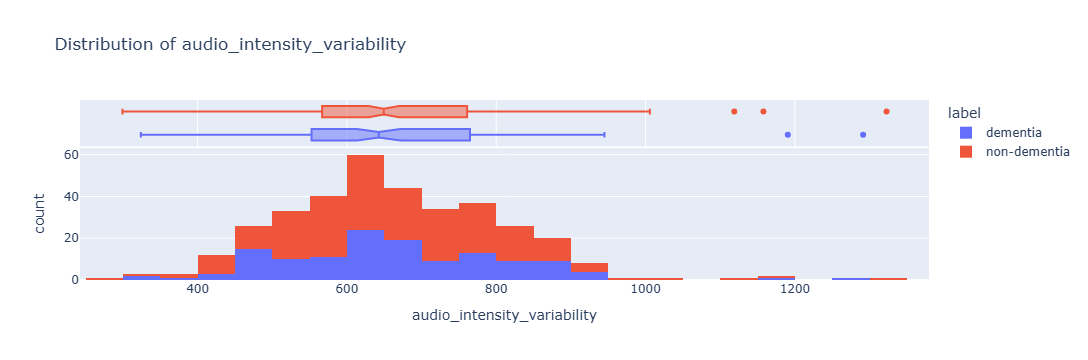

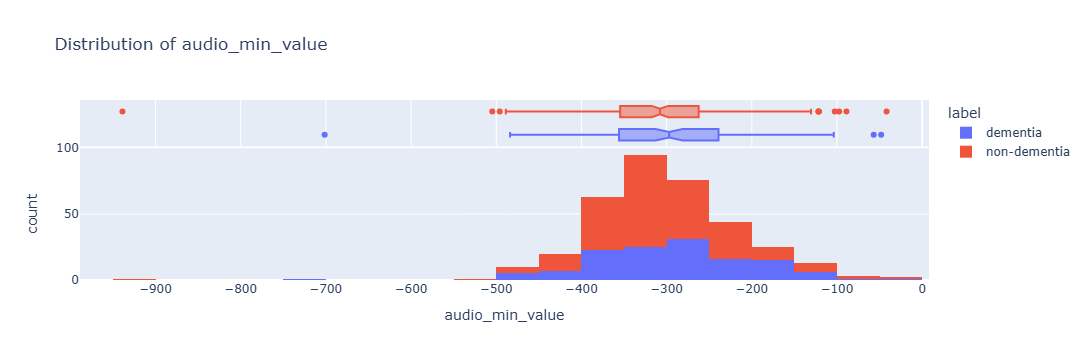

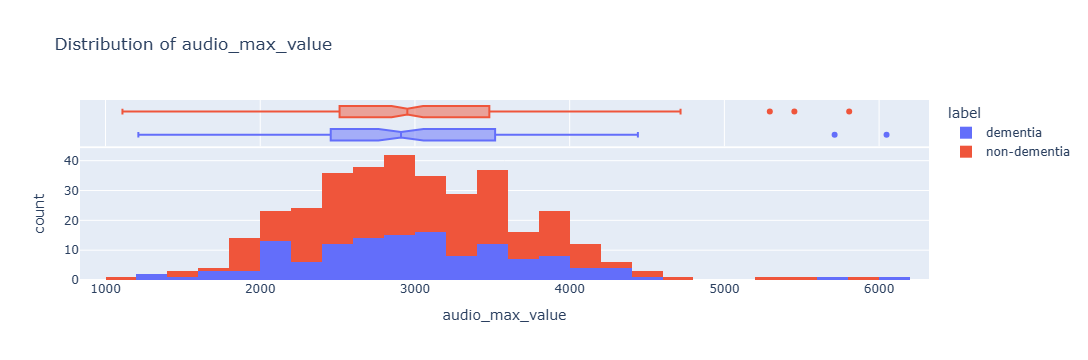

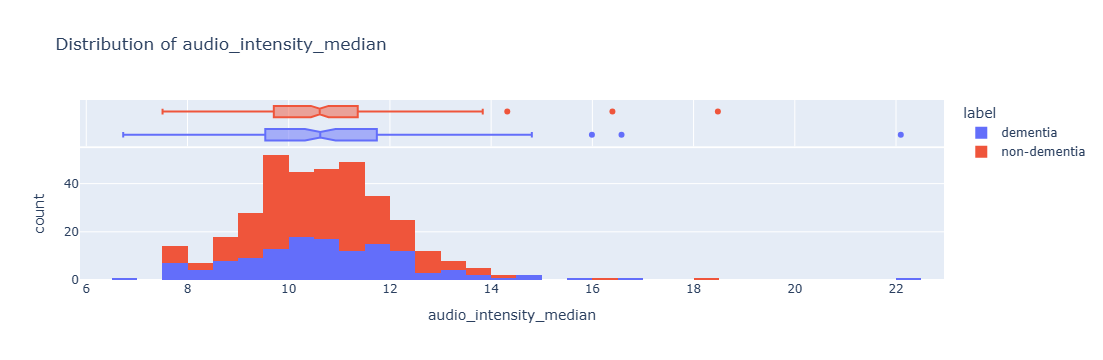

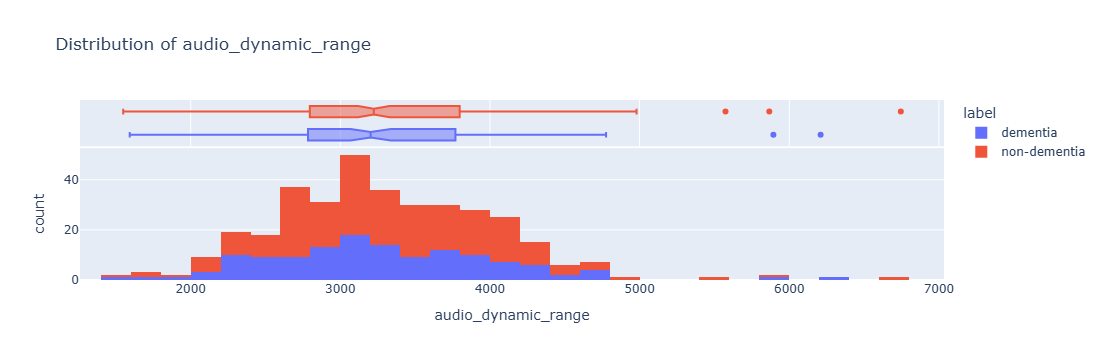

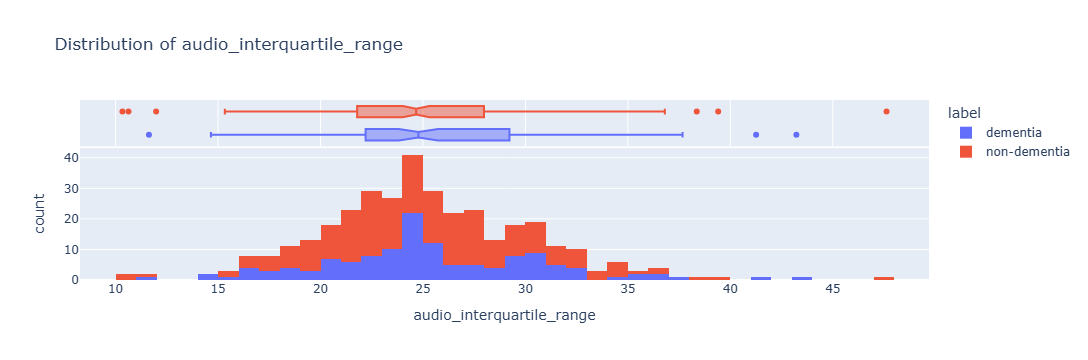

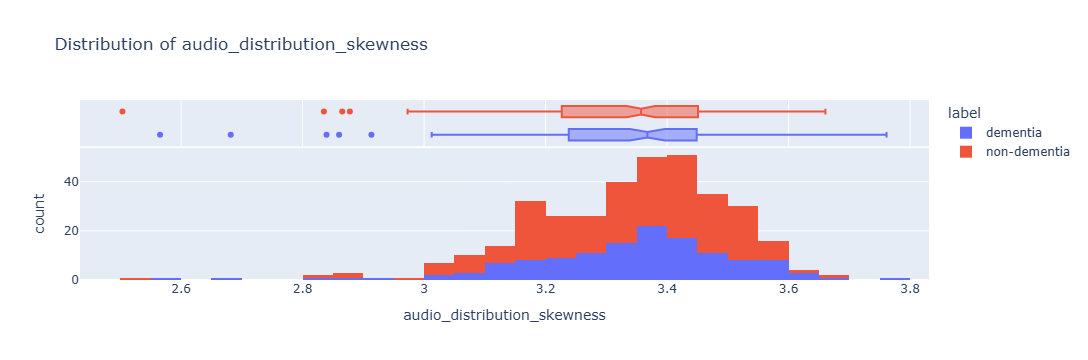

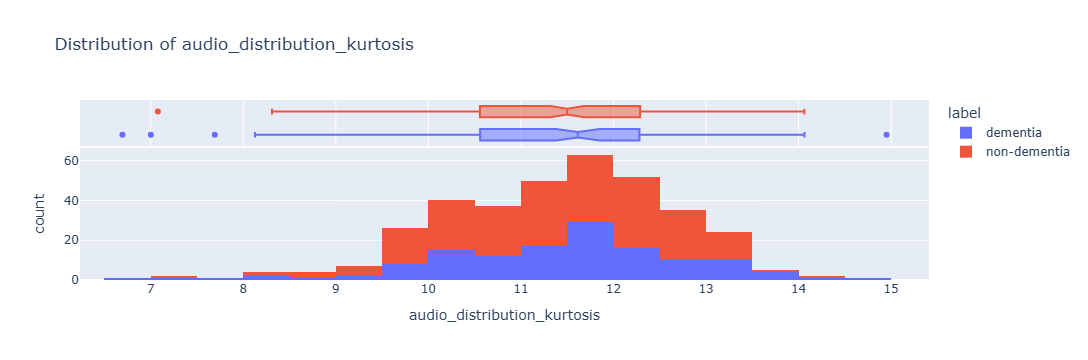

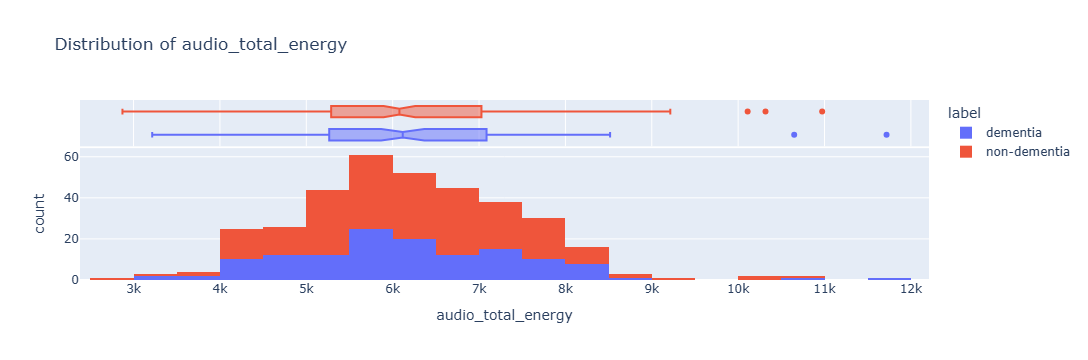

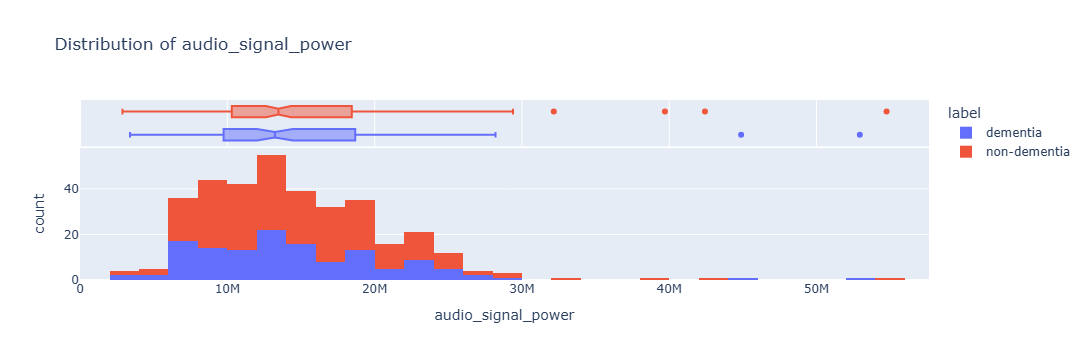

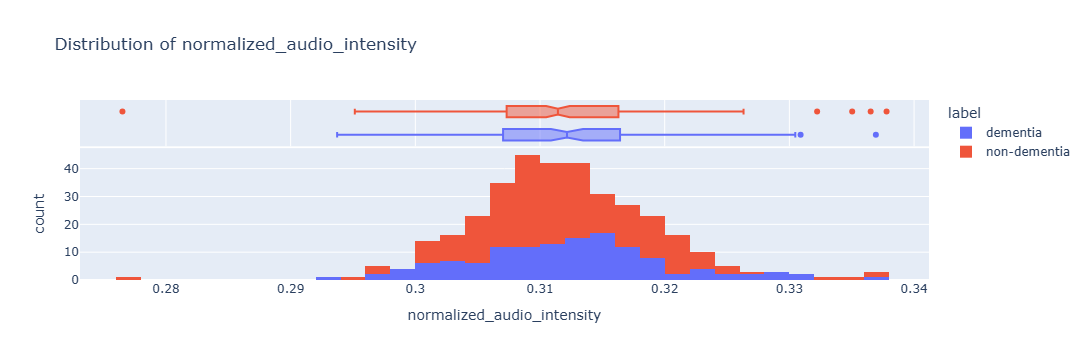

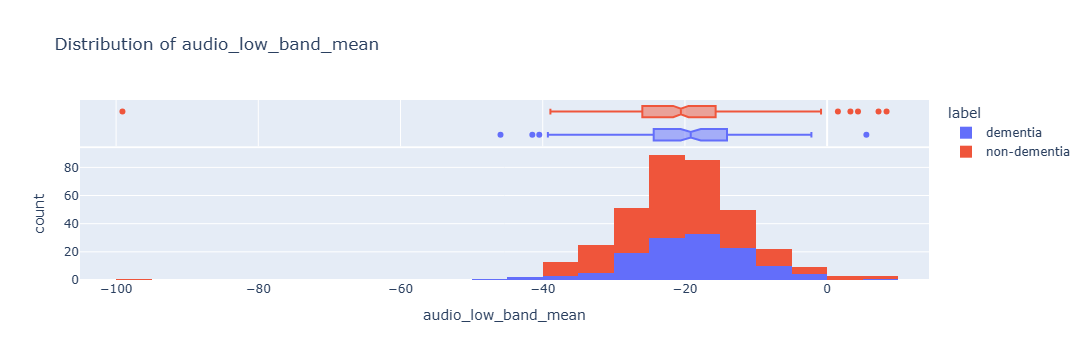

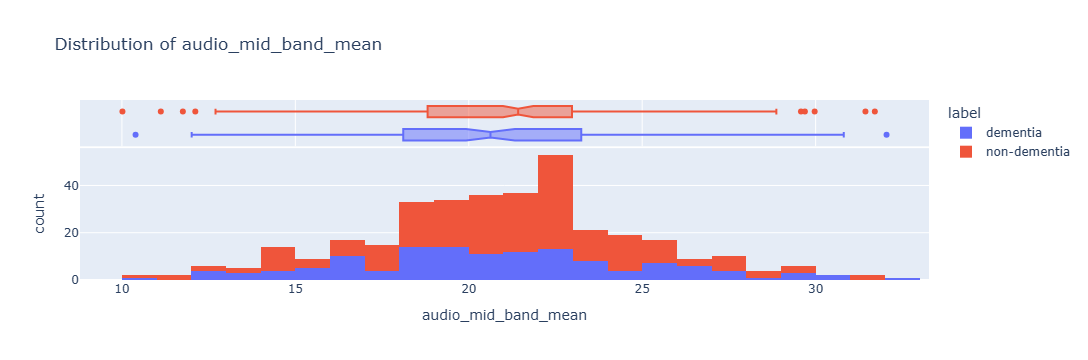

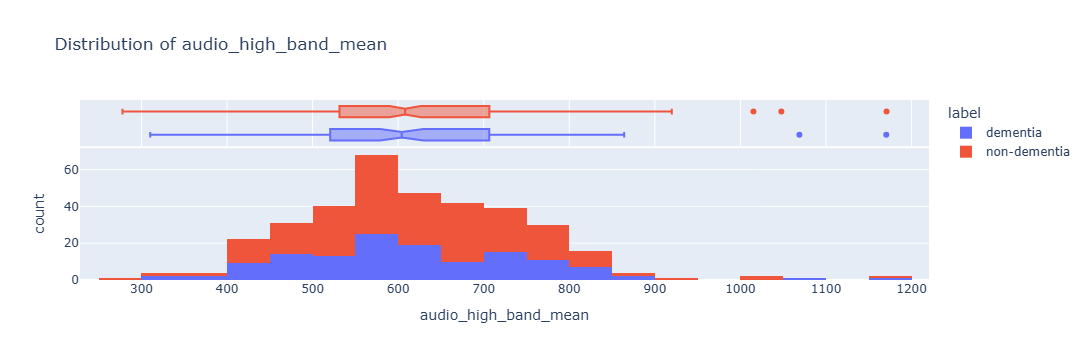

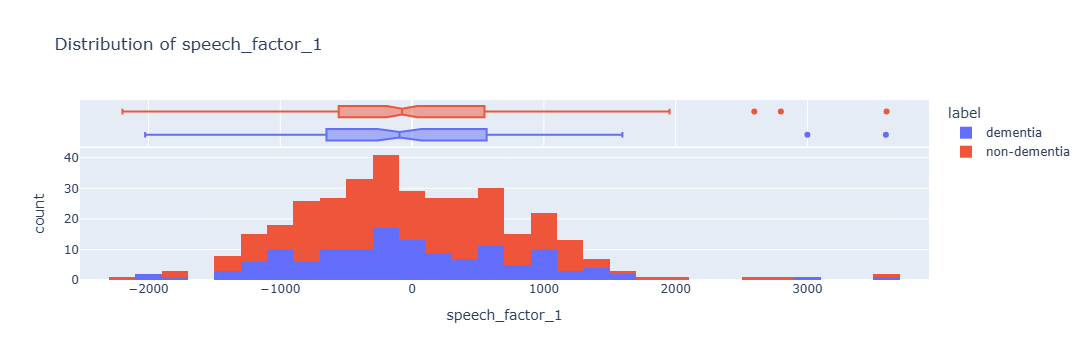

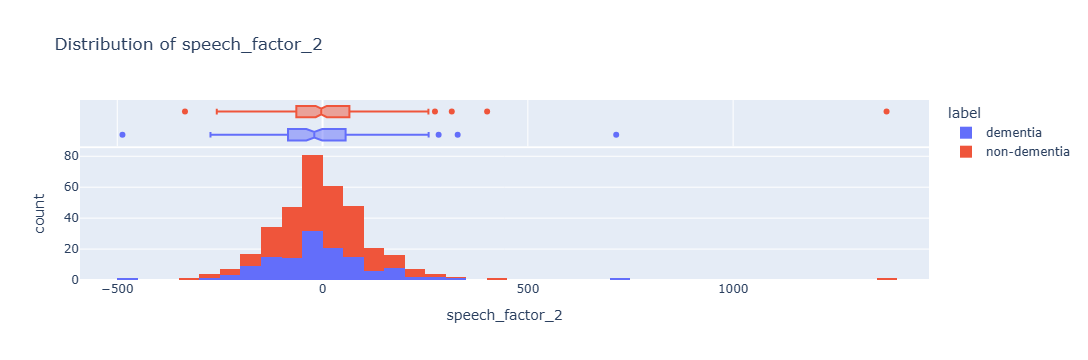

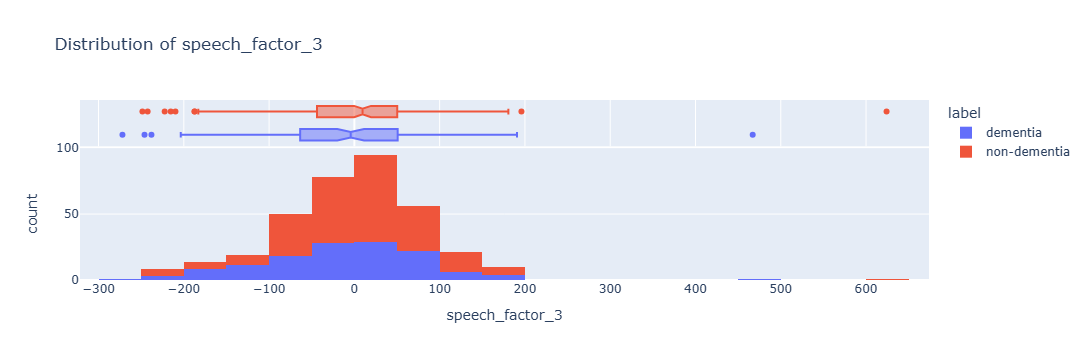

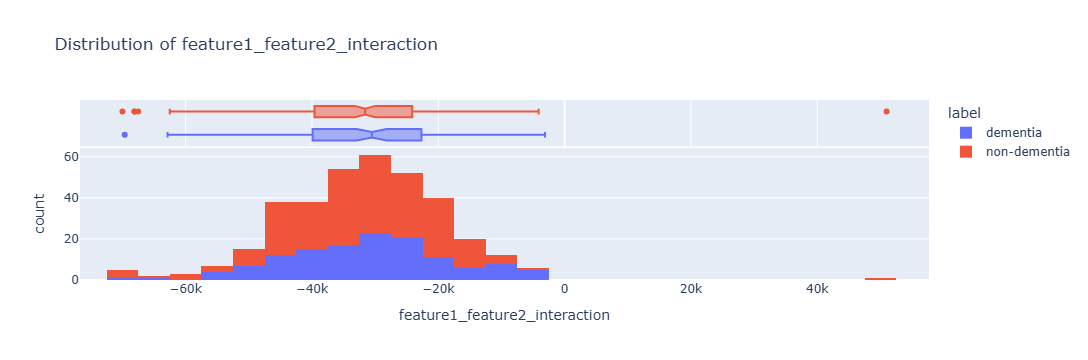

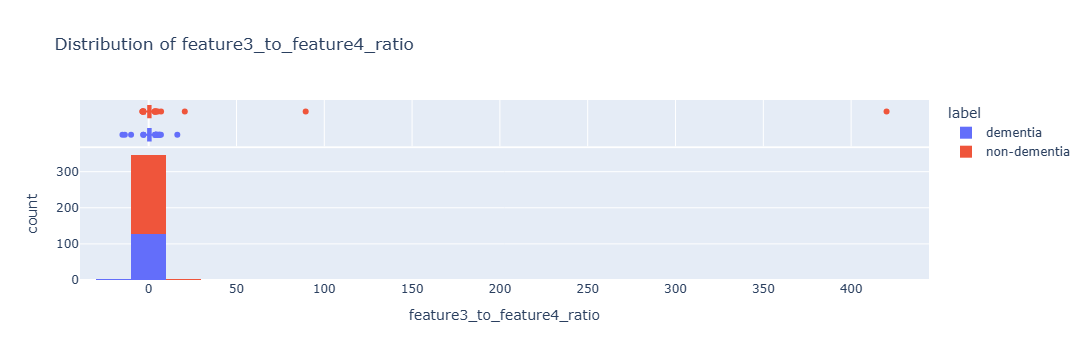

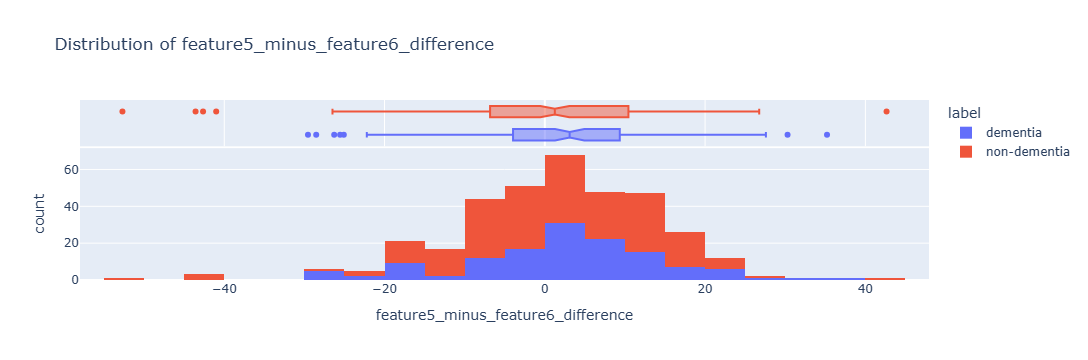

In [22]:
for col in engineered_cols:
    fig = px.histogram(
        df,
        x=col,
        color="label",
        marginal="box",
        nbins=40,
        title=f"Distribution of {col}"
    )
    fig.show()


### **Boxplot Analysis of Engineered Audio Features**

To analyze how each engineered audio feature differs between *dementia* and *non-dementia* speech samples, we plotted boxplots for all engineered features.

```python
for col in engineered_cols:
    fig = px.box(
        df,
        x="label",
        y=col,
        points="all",
        title=f"Boxplot of {col} by Label"
    )
    fig.show()
```

#### **What This Visualization Represents**

Each boxplot shows:

- **Median** (middle line)
- **Interquartile range (IQR)** — where 50% of values lie
- **Whiskers** — the overall spread of the feature
- **Outliers** — shown as individual dots
- Comparison across the two labels:
  -  *Dementia*
  -  *Non-dementia*

#### **Purpose of Boxplots**

Boxplots help us:

- Understand **central tendency** (whether dementia samples tend to have lower/higher feature values)
- Compare **feature variability** between classes
- Detect **overlapping vs. separable patterns**
- Identify **outliers**, which may reflect differences in speech clarity, energy, or articulation

#### **Example Insight: `audio_intensity_mean`**

From the boxplot shown:

- Both groups have a similar median intensity, but:
  - Dementia samples show **slightly lower intensity** on average.
  - Non-dementia samples exhibit **more spread and more high-value outliers**, indicating stronger or more expressive speech.
- This suggests that **speech energy** may help differentiate the two classes, although separation is not very strong — which explains why model accuracy is moderate.

#### **Overall Takeaway**

Boxplots provide a quick way to visually inspect whether engineered features capture meaningful differences between dementia and non-dementia speech.  
While some features show separation, many distributions overlap — which aligns with the moderate ML performance and highlights the complexity of detecting cognitive decline from audio alone.

---


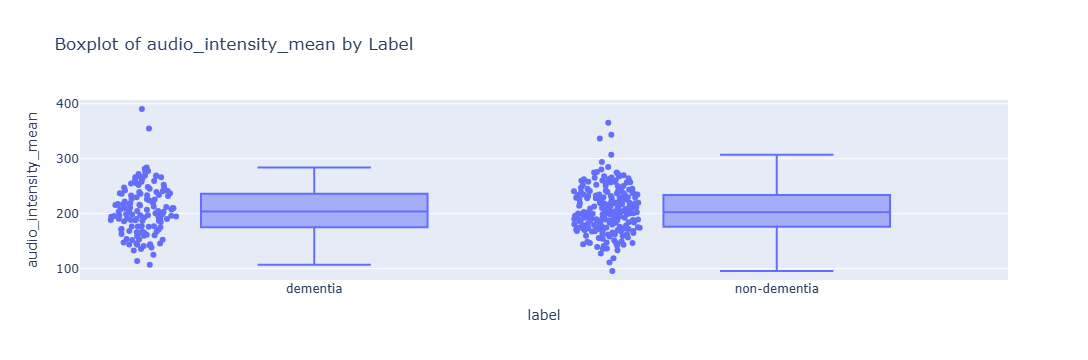

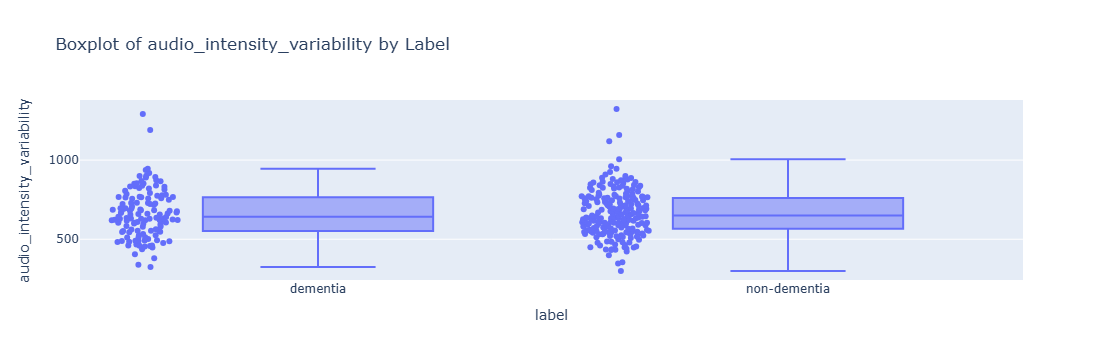

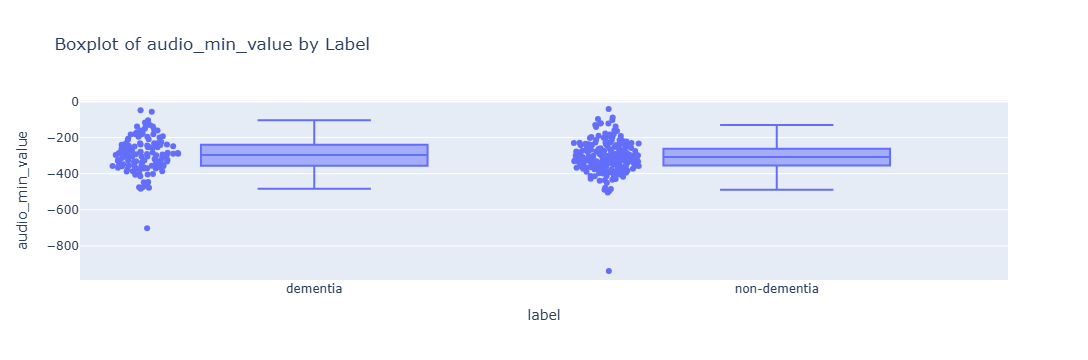

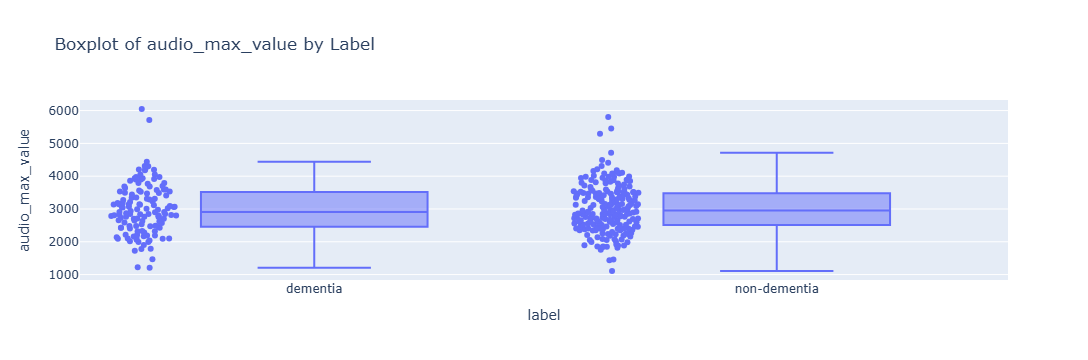

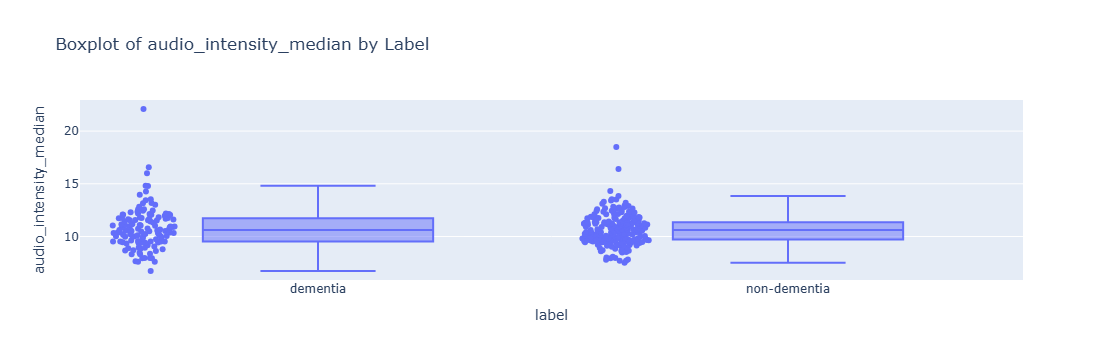

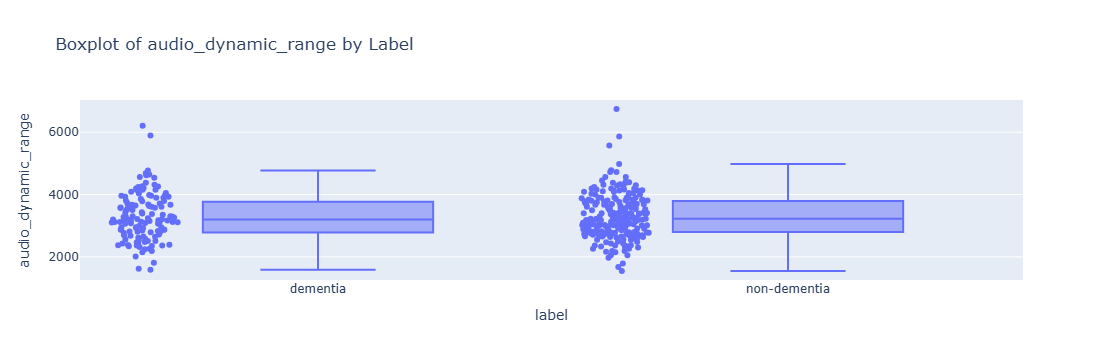

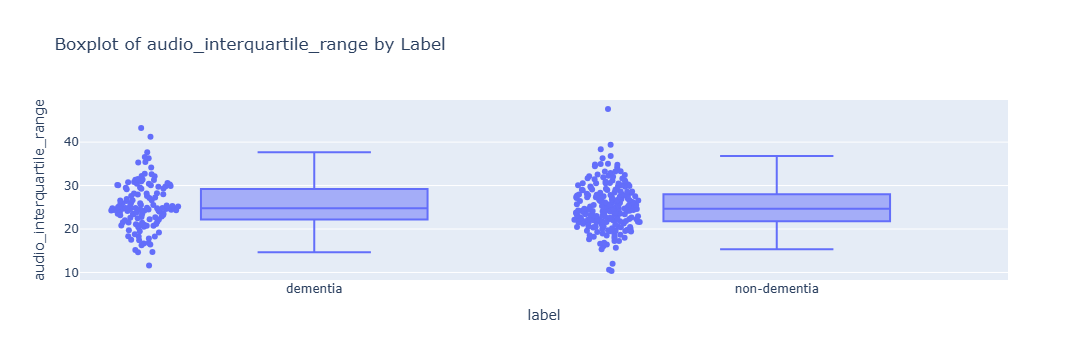

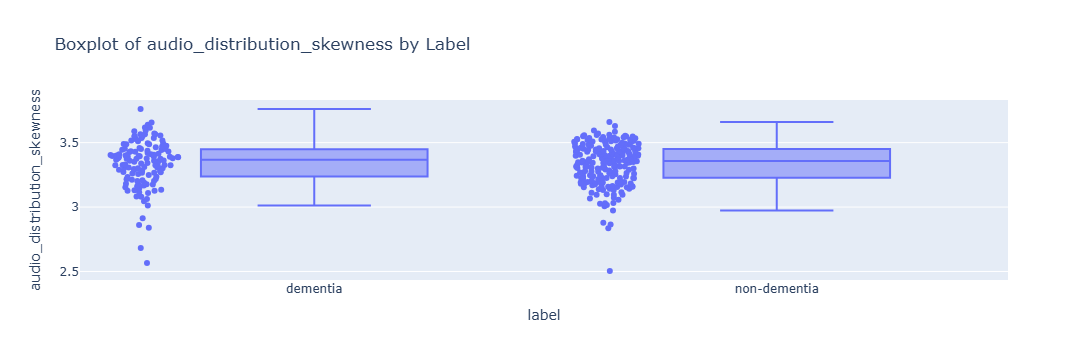

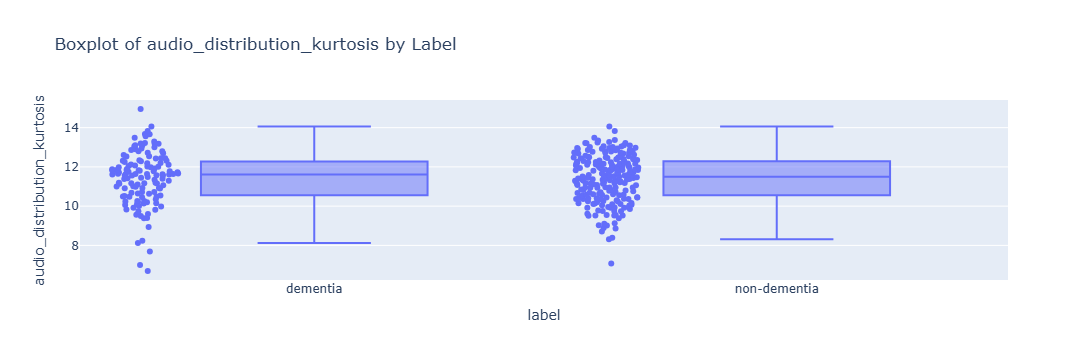

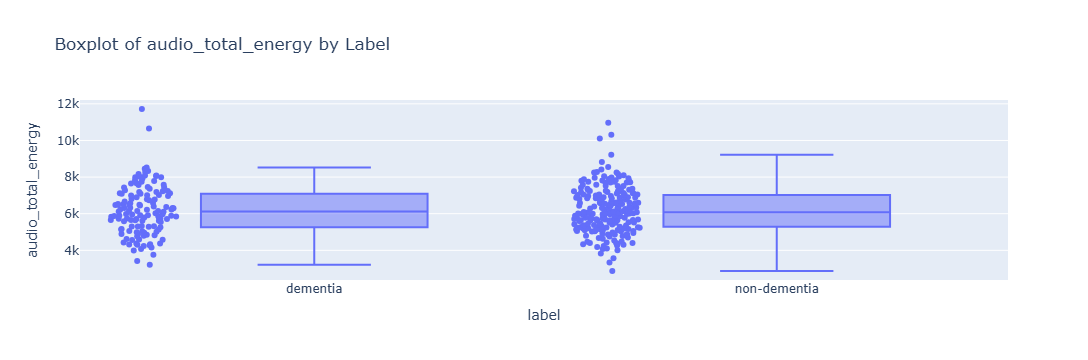

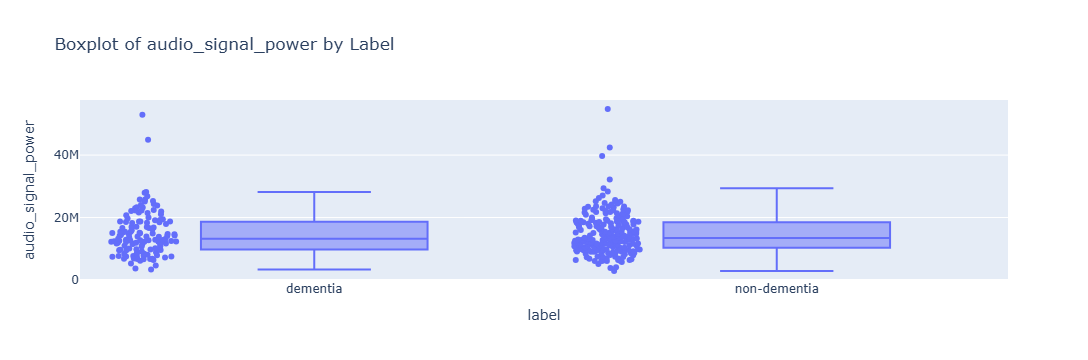

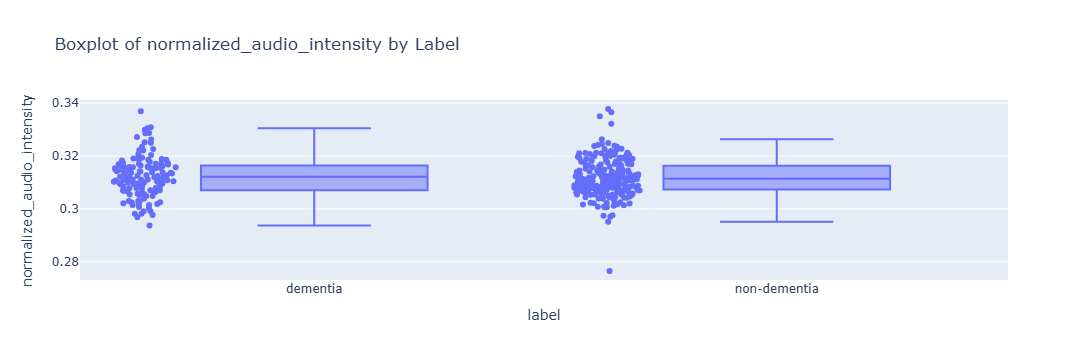

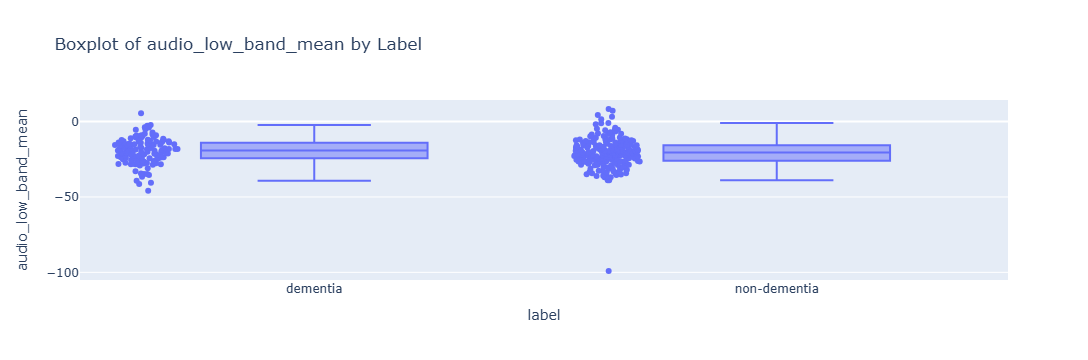

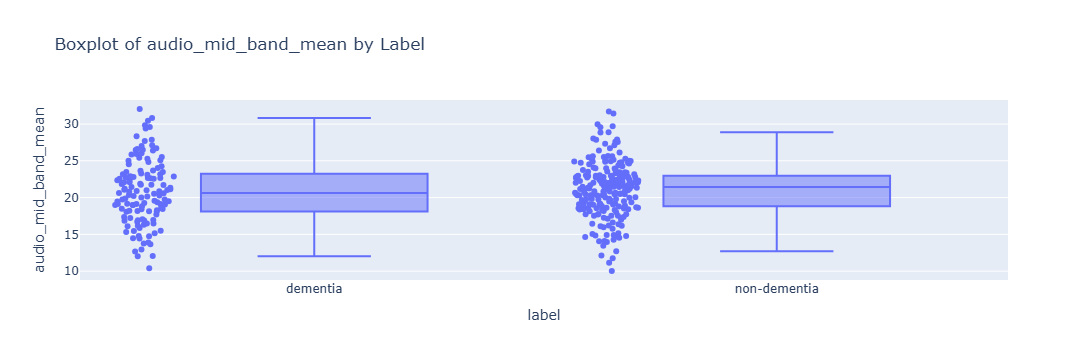

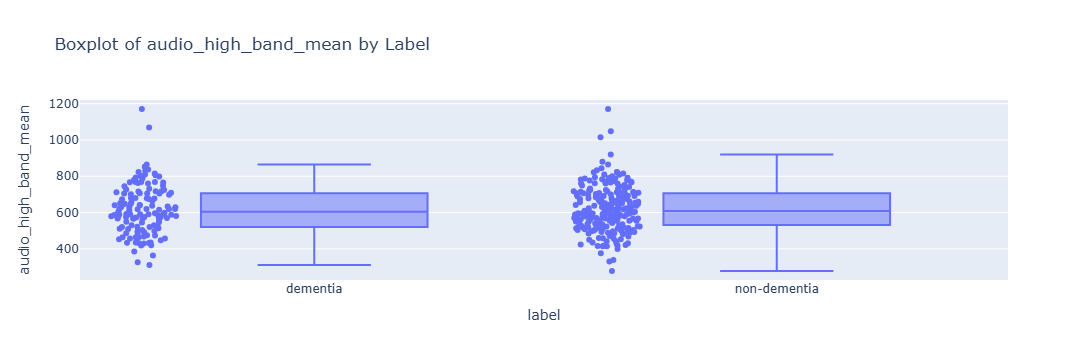

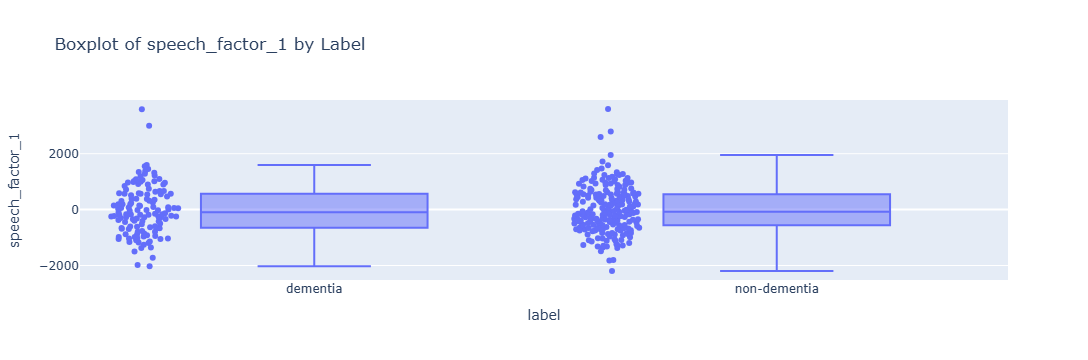

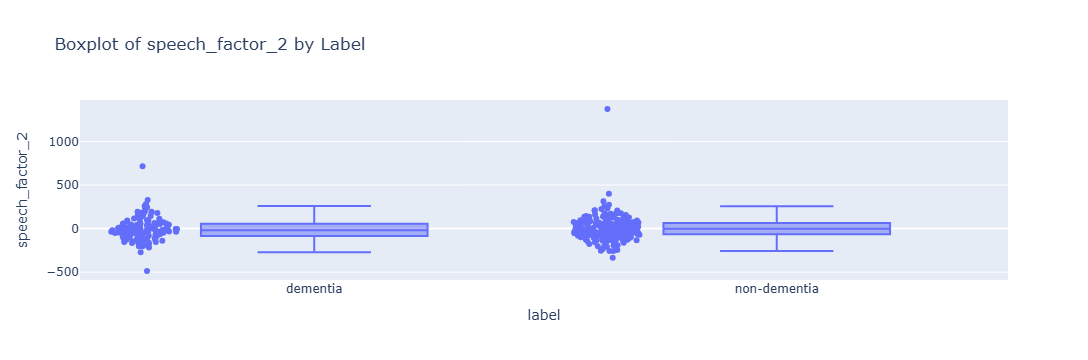

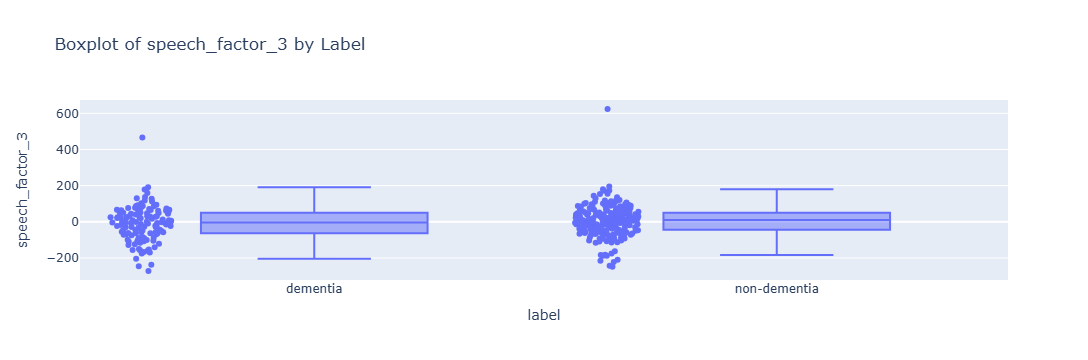

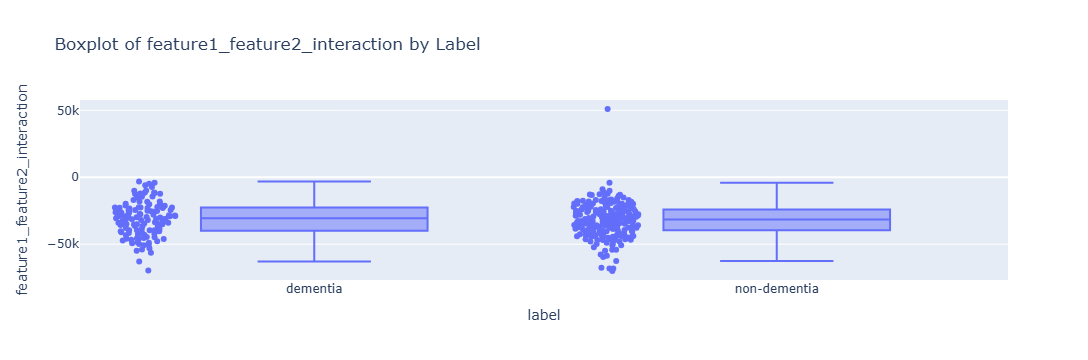

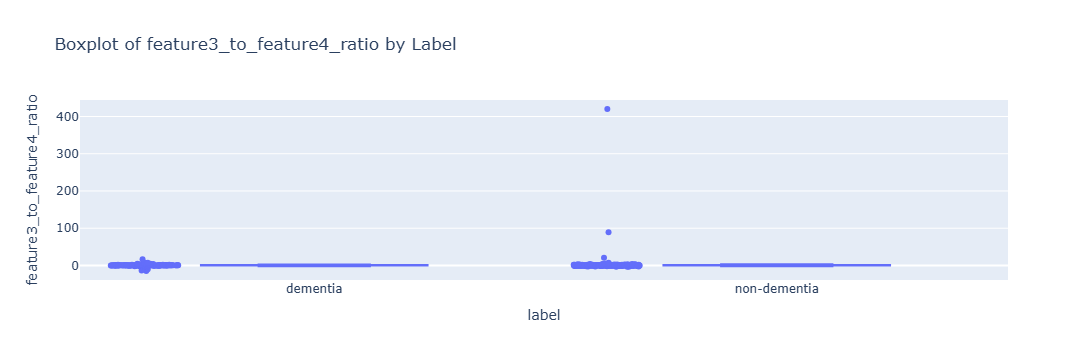

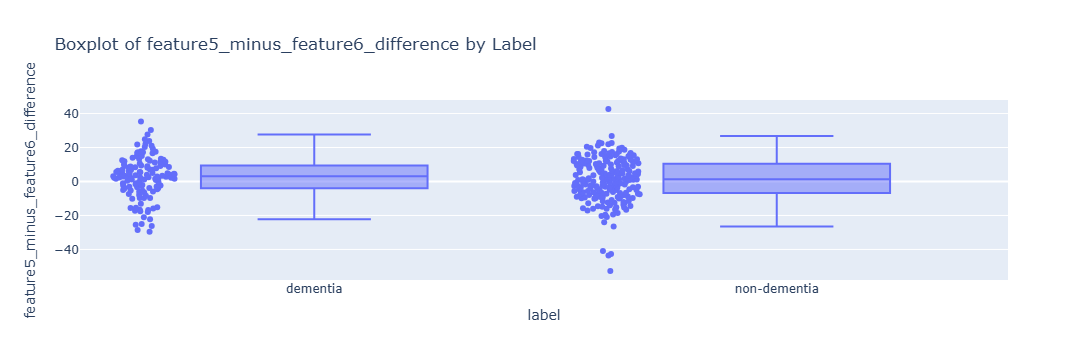

In [23]:
for col in engineered_cols:
    fig = px.box(
        df,
        x="label",
        y=col,
        points="all",
        title=f"Boxplot of {col} by Label"
    )
    fig.show()


###  Correlation Heatmap of Engineered Audio Features

To understand how the engineered audio features relate to one another, we created a correlation heatmap using only the engineered features. This helps identify patterns, redundancies, and potential feature groups that influence the machine learning model.


###  **What This Heatmap Tells Us**

Each cell represents the **correlation coefficient** (ranging from -1 to +1) between two engineered features.

- **Dark blue** → strong positive correlation (features increase together)  
- **Dark red** → strong negative correlation (one increases while the other decreases)  
- **White** → little to no linear relationship  

---

### **Key Insights From the Heatmap**

#### **1. Strong Feature Clusters**
Several engineered features group together because they measure similar speech characteristics:

- **Energy-based features** (`audio_total_energy`, `audio_signal_power`, `audio_intensity_mean`)  
  → These show very strong positive correlation (0.8–1.0), indicating they capture similar underlying signal intensity.

- **Band energy features** (`audio_low_band_mean`, `audio_mid_band_mean`, `audio_high_band_mean`)  
  → Also strongly correlated, reflecting frequency distribution similarities across speech segments.

- **Statistical descriptors** (`audio_intensity_variability`, `audio_interquartile_range`, `audio_distribution_kurtosis`)  
  → These measure spread/shape of the data and naturally align with each other.

---

#### **2. Some Features Are Nearly Redundant**
Correlations near **+1** (e.g., 0.95–1.00) indicate features that may not add much independent information.

Examples:
- `audio_signal_power` and `audio_total_energy`
- `audio_max_value` and `audio_high_band_mean`
- `feature1_feature2_interaction` and MFCC-derived values  

This suggests optional **feature reduction** (PCA or selection) could help simplify the model.

---

#### **3. Negative Correlations Reveal Opposing Trends**
Certain features have meaningful negative relationships:

- When **signal intensity increases**, features like **skewness** or **variability** may decrease.
- These opposing patterns may help the model distinguish subtle speech changes in dementia.

---

#### **4. Multicollinearity Explains Lower Model Performance**
The heatmap shows **many highly correlated features**, meaning the dataset has:

- Redundant predictors  
- Less independent information  
- Higher risk of overfitting  

This helps explain why even advanced models (Random Forest, XGBoost, Stacking) did not achieve very high accuracy — the features may not provide enough separable signals between dementia vs. non-dementia.

---

### **Why This Heatmap Is Important for the Project**

- Helps diagnose **feature redundancy**
- Validates that engineered features represent logical groups (energy, frequency, variability)
- Identifies where **feature selection or dimensionality reduction** could improve performance
- Supports the narrative: *speech differences between dementia and non-dementia patients are subtle, requiring more advanced or additional features (prosody, linguistic markers, etc.)*

---


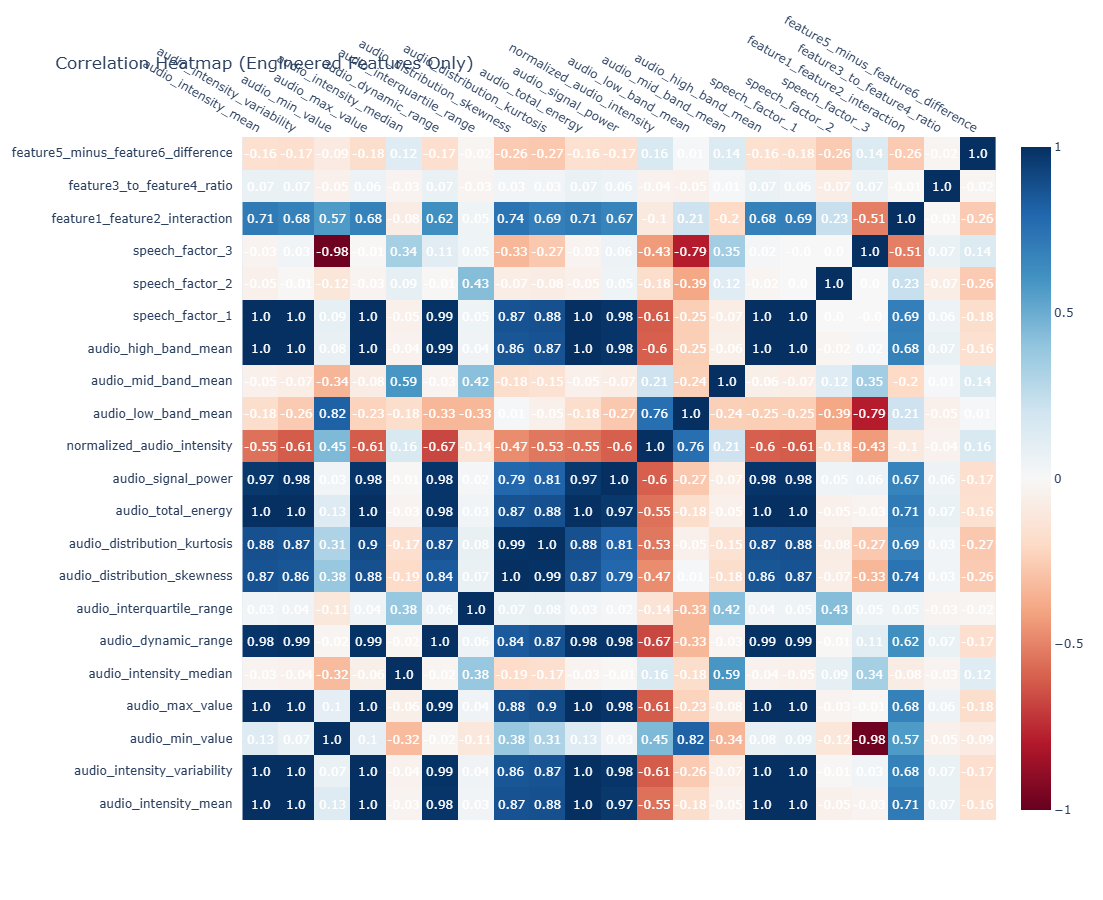

In [24]:
import plotly.figure_factory as ff
import numpy as np

# Focus only on engineered features (better visibility)
selected = df[engineered_cols]

corr = selected.corr().round(2)

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    colorscale="RdBu",
    showscale=True,
    zmin=-1, zmax=1
)

fig.update_layout(
    title="Correlation Heatmap (Engineered Features Only)",
    width=900,
    height=900
)

fig.show()


### **Standardized Mean Comparison of Engineered Features**

This visualization compares the standardized mean values (z-scores) of the engineered audio features between **dementia** and **non-dementia** groups.  
By standardizing each feature, we ensure they are on the same scale, allowing fair comparison.

Higher z-scores indicate that a feature tends to have higher values in a specific group, while lower scores indicate reduced feature levels.

### **Key Insights**
- Some engineered features show clear separation between dementia and non-dementia groups.  
- Differences in these z-scores may capture subtle speech variability related to cognitive decline.  
- Features with the largest separation may contribute strongly to model prediction power.  
- This visualization helps identify which engineered features are most discriminative.



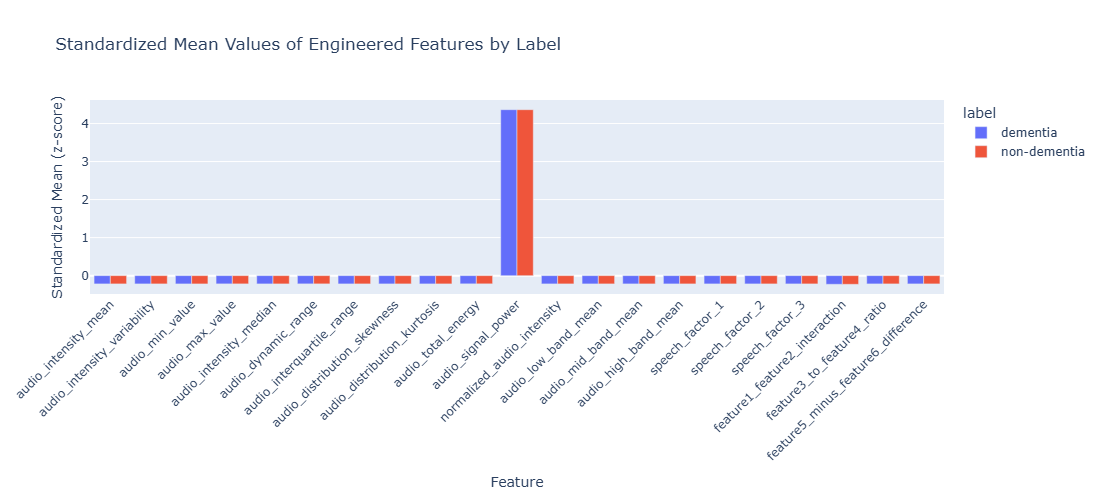

In [25]:
group_means = df.groupby("label")[engineered_cols].mean().T  # rows = features, cols = labels

group_means_std = (group_means - group_means.mean()) / group_means.std()
plot_df = group_means_std.reset_index().melt(
    id_vars="index",
    var_name="label",
    value_name="z_mean"
)

fig = px.bar(
    plot_df,
    x="index",
    y="z_mean",
    color="label",
    barmode="group",
    title="Standardized Mean Values of Engineered Features by Label"
)

fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Standardized Mean (z-score)",
    xaxis_tickangle=-45,
    width=1000,
    height=500
)

fig.show()


### **Statistical Significance Testing of Engineered Audio Features** ###

To evaluate whether the engineered audio features show meaningful differences between dementia and non-dementia groups, an independent two-sample t-test was applied to each feature. This test compares the average values of each feature across the two groups while accounting for unequal variances.

## **Key Insights** ##

- None of the engineered features achieved statistical significance at the conventional threshold (p < 0.05).

- This suggests that individual audio features alone are not strong discriminators of cognitive decline.

- Speech changes associated with dementia appear to be subtle and distributed across multiple acoustic dimensions, rather than driven by a single dominant feature.

- These findings support the use of machine learning models, which can learn complex combinations and interactions among multiple weak predictors.

- The results reinforce the hypothesis that early cognitive decline manifests as gradual and nuanced changes in speech patterns, requiring multivariate modeling rather than univariate analysis.

In [26]:
from scipy.stats import ttest_ind

results = []
for col in engineered_cols:
    d = df[df.label=='dementia'][col]
    nd = df[df.label=='non-dementia'][col]
    stat, p = ttest_ind(d, nd, equal_var=False)
    results.append((col, p))

sig_results = pd.DataFrame(results, columns=['Feature','p_value']).sort_values('p_value')
sig_results


Feature   p_value
17                     speech_factor_3  0.173346
2                      audio_min_value  0.186154
12                 audio_low_band_mean  0.217314
19          feature3_to_feature4_ratio  0.236252
20  feature5_minus_feature6_difference  0.302884
18       feature1_feature2_interaction  0.472294
13                 audio_mid_band_mean  0.482320
4               audio_intensity_median  0.493352
16                     speech_factor_2  0.507299
11          normalized_audio_intensity  0.586666
6            audio_interquartile_range  0.631676
5                  audio_dynamic_range  0.742003
14                audio_high_band_mean  0.814247
15                     speech_factor_1  0.828572
1          audio_intensity_variability  0.832449
9                   audio_total_energy  0.861351
0                 audio_intensity_mean  0.861351
3                      audio_max_value  0.870193
8          audio_distribution_kurtosis  0.892645
7          audio_distribution_skewness  0.945172
10                  audio_signal_power  0.948812

### **PCA Visualization of Combined Audio Features** ###

To explore whether dementia and non-dementia speech samples are separable in a lower-dimensional space, Principal Component Analysis (PCA) was applied to all extracted and engineered audio features. PCA reduces the high-dimensional feature space into two principal components while preserving as much variance as possible.

Each point in the plot represents a single speech sample, projected onto the first two principal components.

## **Key Observations** ##

- The dementia and non-dementia samples show substantial overlap in the 2D PCA space.

- No clear linear boundary separates the two classes using only the first two components.

- This indicates that speech-based differences related to cognitive decline are subtle and distributed across many dimensions, rather than dominated by a small number of features.

- PCA captures overall variance, not class separation, which explains why strong visual separation is not observed.

## **Why This Matters** ##

- The overlap reinforces the need for non-linear and multivariate machine learning models rather than simple threshold-based or linear approaches.

- It supports the hypothesis that early cognitive decline manifests as nuanced speech pattern changes, requiring models that can learn complex feature interactions.

- PCA serves as an important diagnostic tool, confirming that classification is a challenging problem rather than a trivial separation task.

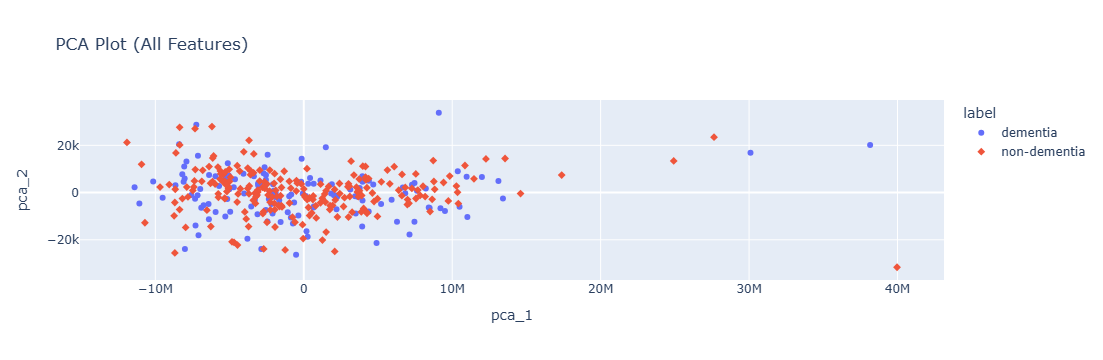

In [27]:
from sklearn.decomposition import PCA
import numpy as np

X = df[feature_cols + engineered_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df["pca_1"] = pca_result[:,0]
df["pca_2"] = pca_result[:,1]

fig = px.scatter(
    df,
    x="pca_1",
    y="pca_2",
    color="label",
    title="PCA Plot (All Features)",
    symbol="label"
)
fig.show()


## **Train–Test Split** ##

The dataset was split into training and testing sets using stratified sampling to preserve the dementia vs non-dementia class balance.

- Training set: 283 samples, 21 features

- Test set: 71 samples, 21 features

## **Class distribution remained consistent:** ##

- Training - 178 non-dementia, 105 dementia

- Testing - 45 non-dementia, 26 dementia

This ensures fair model evaluation and prevents bias due to class imbalance.

In [28]:
from sklearn.model_selection import train_test_split

# Select features (engineered only OR combine with original)
X = df[engineered_cols]     # you can also use: feature_cols + engineered_cols
y = df["label_num"]         # 0 = non-dementia, 1 = dementia

# Train-test split with stratification (keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% test set
    stratify=y,             # keeps dementia vs non-dementia balanced
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (283, 21)
X_test shape: (71, 21)
y_train distribution:
 label_num
0    178
1    105
Name: count, dtype: int64
y_test distribution:
 label_num
0    45
1    26
Name: count, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd


## **Logistic Regression with SMOTE** ##

A Logistic Regression model was trained using a pipeline that includes SMOTE for class balancing and Standard Scaling for feature normalization.

Performance on the test set:

- Accuracy: 60.6%

- Precision: 46.7%

- Recall: 53.8%

- F1-Score: 0.50

- ROC-AUC: 0.66

## **Confusion Matrix:** ##

- Correctly identified 14 dementia cases

- Correctly identified 29 non-dementia cases

This model shows a reasonable balance between precision and recall, making it suitable for detecting dementia where missing positive cases is costly.

In [37]:
from sklearn.linear_model import LogisticRegression

pipe_lr = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print(" Accuracy :", accuracy_score(y_test, y_pred_lr))
print(" Precision:", precision_score(y_test, y_pred_lr))
print(" Recall   :", recall_score(y_test, y_pred_lr))
print(" F1-Score :", f1_score(y_test, y_pred_lr))
print(" ROC-AUC  :", roc_auc_score(y_test, y_proba_lr))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
 Accuracy : 0.6056338028169014
 Precision: 0.4666666666666667
 Recall   : 0.5384615384615384
 F1-Score : 0.5
 ROC-AUC  : 0.6615384615384615
 Confusion Matrix:
 [[29 16]
 [12 14]]


## **Support Vector Machine (RBF) with SMOTE** ##

An SVM model with an RBF kernel was trained using a pipeline that applies SMOTE for class balancing and feature scaling.

# *Performance on the test set:* #

- Accuracy: 57.7%

- Precision: 42.3%

- Recall: 42.3%

- F1-Score: 0.42

- ROC-AUC: 0.56

## **Confusion Matrix:** ##

- Correctly identified 30 non-dementia cases

- Lower detection rate for dementia cases compared to Logistic Regression

This model shows weaker class separation and reduced sensitivity to dementia cases, suggesting that SVM with the current feature set may not capture subtle speech patterns effectively.

In [39]:
from sklearn.svm import SVC

pipe_svm = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
])

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)
y_proba_svm = pipe_svm.predict_proba(X_test)[:, 1]

print("SVM (RBF):")
print(" Accuracy :", accuracy_score(y_test, y_pred_svm))
print(" Precision:", precision_score(y_test, y_pred_svm))
print(" Recall   :", recall_score(y_test, y_pred_svm))
print(" F1-Score :", f1_score(y_test, y_pred_svm))
print(" ROC-AUC  :", roc_auc_score(y_test, y_proba_svm))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM (RBF):
 Accuracy : 0.5774647887323944
 Precision: 0.4230769230769231
 Recall   : 0.4230769230769231
 F1-Score : 0.4230769230769231
 ROC-AUC  : 0.5632478632478632
 Confusion Matrix:
 [[30 15]
 [15 11]]


# **Random Forest with SMOTE** #

A Random Forest classifier was trained using a SMOTE-based pipeline to address class imbalance and improve dementia detection.

### *Performance on the test set:* ###

- Accuracy: 57.7%

- Precision: 41.7%

- Recall: 38.5%

- F1-Score: 0.40

- ROC-AUC: 0.55

## **Confusion Matrix:** ##

- Correctly classified 31 non-dementia samples

- Correctly identified 10 dementia samples

While Random Forest performs comparably to SVM in overall accuracy, it shows lower recall, meaning it misses a larger proportion of dementia cases. This indicates that tree-based models may struggle to capture subtle acoustic differences without richer or more discriminative features.

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:, 1]

print("Random Forest:")
print(" Accuracy :", accuracy_score(y_test, y_pred_rf))
print(" Precision:", precision_score(y_test, y_pred_rf))
print(" Recall   :", recall_score(y_test, y_pred_rf))
print(" F1-Score :", f1_score(y_test, y_pred_rf))
print(" ROC-AUC  :", roc_auc_score(y_test, y_proba_rf))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
 Accuracy : 0.5774647887323944
 Precision: 0.4166666666666667
 Recall   : 0.38461538461538464
 F1-Score : 0.4
 ROC-AUC  : 0.5452991452991452
 Confusion Matrix:
 [[31 14]
 [16 10]]


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", GradientBoostingClassifier(random_state=42))
])

pipe_gb.fit(X_train, y_train)
y_pred_gb = pipe_gb.predict(X_test)
y_proba_gb = pipe_gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting:")
print(" Accuracy :", accuracy_score(y_test, y_pred_gb))
print(" Precision:", precision_score(y_test, y_pred_gb))
print(" Recall   :", recall_score(y_test, y_pred_gb))
print(" F1-Score :", f1_score(y_test, y_pred_gb))
print(" ROC-AUC  :", roc_auc_score(y_test, y_proba_gb))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
 Accuracy : 0.5774647887323944
 Precision: 0.4090909090909091
 Recall   : 0.34615384615384615
 F1-Score : 0.375
 ROC-AUC  : 0.576068376068376
 Confusion Matrix:
 [[32 13]
 [17  9]]


In [49]:
pip install xgboost


  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nayan\Downloads\combined_audio_features_transcripts.csv")

# Clean label
df['label'] = df['label'].astype(str).str.strip().str.lower()
df['label'] = df['label'].replace({
    'dementia':'dementia', 'ad':'dementia', 'alzheimers':'dementia', "alzheimer's":'dementia', '1':'dementia',
    'non-dementia':'non-dementia', 'non dementia':'non-dementia', 'healthy':'non-dementia',
    'control':'non-dementia', 'hc':'non-dementia', '0':'non-dementia'
})

# Encode
df['label_num'] = df['label'].map({'non-dementia':0, 'dementia':1})
df = df.dropna(subset=['label_num'])

feature_cols = [c for c in df.columns if c.startswith("feature_")]
X = df[feature_cols]
y = df['label_num']


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(283, 30) (71, 30)


In [59]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: label_num
0    178
1    105
Name: count, dtype: int64
After SMOTE: label_num
1    178
0    178
Name: count, dtype: int64


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print("Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train:", y_train_smote.shape)
print("y_test:", y_test.shape)


Shapes:
X_train_scaled: (356, 30)
X_test_scaled: (71, 30)
y_train: (356,)
y_test: (71,)


In [63]:

from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

X_train_xgb = X_train_scaled
X_test_xgb = X_test_scaled

neg = (y_train_smote == 0).sum()
pos = (y_train_smote == 1).sum()
scale_pos = neg / pos

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos,
    n_jobs=-1
)

xgb.fit(X_train_xgb, y_train_smote)

y_pred = xgb.predict(X_test_xgb)
y_proba = xgb.predict_proba(X_test_xgb)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("XGBOOST MODEL PERFORMANCE")
print("--------------------------")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


XGBOOST MODEL PERFORMANCE
--------------------------
Accuracy : 0.5775
Precision: 0.3889
Recall   : 0.2692
F1-Score : 0.3182
ROC-AUC  : 0.5419

Confusion Matrix:
[[34 11]
 [19  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69        45
           1       0.39      0.27      0.32        26

    accuracy                           0.58        71
   macro avg       0.52      0.51      0.51        71
weighted avg       0.55      0.58      0.56        71



In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# If not already cleaned:
df['label'] = df['label'].astype(str).str.strip().str.lower()
df['label'] = df['label'].replace({
    'dementia':'dementia', 'ad':'dementia', 'alzheimers':'dementia', "alzheimer's":'dementia', '1':'dementia',
    'non-dementia':'non-dementia', 'non dementia':'non-dementia', 'healthy':'non-dementia',
    'control':'non-dementia', 'hc':'non-dementia', '0':'non-dementia'
})
df['label_num'] = df['label'].map({'non-dementia': 0, 'dementia': 1})
df = df.dropna(subset=['label_num'])

feature_cols = [c for c in df.columns if c.startswith("feature_")]
X = df[feature_cols].values
y = df['label_num'].astype(int).values

print("Class distribution (0=non-dementia, 1=dementia):")
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Class distribution (0=non-dementia, 1=dementia):
{0: 223, 1: 131}
Train shape: (283, 30)  Test shape: (71, 30)


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

results = []

def eval_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    if y_proba is not None and len(np.unique(y_true)) == 2:
        auc = roc_auc_score(y_true, y_proba)
    else:
        auc = np.nan
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": auc
    })
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-Score : {f1:.3f}")
    if not np.isnan(auc):
        print(f"ROC-AUC  : {auc:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification report:\n", classification_report(y_true, y_pred, zero_division=0))

# 1) Logistic Regression
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]
eval_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

# 2) SVM (RBF)
svm = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:,1]
eval_model("SVM RBF", y_test, y_pred_svm, y_proba_svm)

# 3) Random Forest (no scaling needed → use original X)
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]
eval_model("Random Forest", y_test, y_pred_rf, y_proba_rf)

# 4) Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:,1]
eval_model("Gradient Boosting", y_test, y_pred_gb, y_proba_gb)

# Summary table
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\n\nModel Performance Summary:")
print(results_df)
### **Model Training & Evaluation (LogReg, SVM, Random Forest, Gradient Boosting)**

In this step, we evaluate four machine learning models on the engineered audio features:

- **Logistic Regression (Balanced)**
- **SVM with RBF Kernel**
- **Random Forest**
- **Gradient Boosting Classifier**

Each model is trained using the same train–test split, and performance is measured using:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **ROC-AUC**
- **Confusion Matrix**
- **Classification Report**




=== Logistic Regression ===
Accuracy : 0.634
Precision: 0.500
Recall   : 0.577
F1-Score : 0.536
ROC-AUC  : 0.670
Confusion matrix:
 [[30 15]
 [11 15]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        45
           1       0.50      0.58      0.54        26

    accuracy                           0.63        71
   macro avg       0.62      0.62      0.62        71
weighted avg       0.65      0.63      0.64        71


=== SVM RBF ===
Accuracy : 0.620
Precision: 0.478
Recall   : 0.423
F1-Score : 0.449
ROC-AUC  : 0.604
Confusion matrix:
 [[33 12]
 [15 11]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        45
           1       0.48      0.42      0.45        26

    accuracy                           0.62        71
   macro avg       0.58      0.58      0.58        71
weighted avg       0.61      0.62      0.61        71


=== R

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# ----- MODELS -----
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
svm = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
rf = RandomForestClassifier(random_state=42, class_weight="balanced_subsample", n_jobs=-1)
gb = GradientBoostingClassifier(random_state=42)

# ----- PARAM GRIDS (kept small so it doesn't run forever) -----
param_grids = {
    "LogReg": {
        "model": log_reg,
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]  # safe with l2
        },
        "scaled": True
    },
    "SVM_RBF": {
        "model": svm,
        "params": {
            "C": [0.1, 1, 10],
            "gamma": ["scale", 0.01, 0.1]
        },
        "scaled": True
    },
    "RandomForest": {
        "model": rf,
        "params": {
            "n_estimators": [100, 300, 500],
            "max_depth": [None, 5, 10],
            "max_features": ["sqrt", "log2"]
        },
        "scaled": False
    },
    "GradientBoosting": {
        "model": gb,
        "params": {
            "n_estimators": [100, 300],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        },
        "scaled": False
    }
}
results = []

for name, cfg in param_grids.items():
    print(f"\n==============================")
    print(f" Grid Search for: {name}")
    print(f"==============================")

    model = cfg["model"]
    params = cfg["params"]
    use_scaled = cfg["scaled"]

    if use_scaled:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test

    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring="f1",       # optimize for F1 (class imbalance)
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_tr, y_train)

    best_model = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV F1 for {name}: {grid.best_score_:.4f}")

    # Evaluate on test data
    y_pred = best_model.predict(X_te)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_te)[:, 1]
    else:
        # fallback for models without predict_proba
        y_proba = np.zeros_like(y_pred, dtype=float)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) == 2 and y_proba.ndim == 1 else np.nan

    print("\nTest Performance")
    print("----------------")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    if not np.isnan(auc):
        print(f"ROC-AUC  : {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Best CV F1": grid.best_score_,
        "Test Accuracy": acc,
        "Test Precision": prec,
        "Test Recall": rec,
        "Test F1": f1,
        "Test ROC-AUC": auc
    })

# Summary table
results_df = pd.DataFrame(results).sort_values(by="Test F1", ascending=False)
print("\n\n==============================")
print("  MODEL COMPARISON (TUNED)")
print("==============================")
print(results_df)



 Grid Search for: LogReg
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params for LogReg: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1 for LogReg: 0.4715

Test Performance
----------------
Accuracy : 0.6056
Precision: 0.4688
Recall   : 0.5769
F1-Score : 0.5172
ROC-AUC  : 0.6598

Confusion Matrix:
[[28 17]
 [11 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        45
           1       0.47      0.58      0.52        26

    accuracy                           0.61        71
   macro avg       0.59      0.60      0.59        71
weighted avg       0.63      0.61      0.61        71


 Grid Search for: SVM_RBF
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params for SVM_RBF: {'C': 10, 'gamma': 'scale'}
Best CV F1 for SVM_RBF: 0.4900

Test Performance
----------------
Accuracy : 0.5915
Precision: 0.4286
Recall   : 0.3462
F1-Score : 0.3830
ROC-AUC  : 0.5342

Co

In [73]:
import pandas as pd
import numpy as np

# label cleanup (if not done)
df['label'] = df['label'].astype(str).str.strip().str.lower()
df['label'] = df['label'].replace({
    'dementia':'dementia', 'ad':'dementia', 'alzheimers':'dementia', "alzheimer's":'dementia', '1':'dementia',
    'non-dementia':'non-dementia', 'non dementia':'non-dementia', 'healthy':'non-dementia',
    'control':'non-dementia', 'hc':'non-dementia', '0':'non-dementia'
})
df['label_num'] = df['label'].map({'non-dementia': 0, 'dementia': 1})

df = df.dropna(subset=['label_num'])

feature_cols = [c for c in df.columns if c.startswith("feature_")]

X = df[feature_cols].values
y = df['label_num'].astype(int).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class counts:", dict(zip(*np.unique(y_train, return_counts=True))))


Train: (283, 30) Test: (71, 30)
Class counts: {0: 178, 1: 105}


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models_and_grids = {
    
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=3000, class_weight="balanced"),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        },
        "scaled": True
    },

    "SVM_RBF": {
        "model": SVC(kernel="rbf", probability=True, class_weight="balanced"),
        "params": {
            "C": [0.1, 1, 5, 10],
            "gamma": ["scale", 0.01, 0.1]
        },
        "scaled": True
    },

    "RandomForest": {
        "model": RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-1),
        "params": {
            "n_estimators": [200, 400, 600],
            "max_depth": [None, 5, 10],
            "max_features": ["sqrt", "log2"]
        },
        "scaled": False
    },

    "GradientBoosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.05, 0.1],
            "max_depth": [2, 3, 4]
        },
        "scaled": False
    }
}


In [77]:
### 🔧 Hyperparameter Tuning with GridSearchCV



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

results = []

for name, cfg in models_and_grids.items():
    print("\n🔍 Tuning:", name)

    model = cfg["model"]
    params = cfg["params"]
    use_scaled = cfg["scaled"]

    X_tr = X_train_scaled if use_scaled else X_train
    X_te = X_test_scaled if use_scaled else X_test

    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring="f1",
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_tr, y_train)

    best_model = grid.best_estimator_

    print("Best Params:", grid.best_params_)
    print("Best CV F1:", round(grid.best_score_, 4))

    # Evaluate on test set
    y_pred = best_model.predict(X_te)
    y_proba = best_model.predict_proba(X_te)[:, 1] if hasattr(best_model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print("\n📊 Test Results for", name)
    print("Accuracy :", round(acc, 3))
    print("Precision:", round(prec, 3))
    print("Recall   :", round(rec, 3))
    print("F1-Score :", round(f1, 3))
    print("ROC-AUC  :", round(auc, 3))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV F1": grid.best_score_,
        "Test Accuracy": acc,
        "Test Recall": rec,
        "Test Precision": prec,
        "Test F1": f1,
        "Test ROC-AUC": auc
    })

results_df = pd.DataFrame(results).sort_values(by="Test F1", ascending=False)
results_df



🔍 Tuning: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1: 0.4715

📊 Test Results for LogisticRegression
Accuracy : 0.606
Precision: 0.469
Recall   : 0.577
F1-Score : 0.517
ROC-AUC  : 0.66

Confusion Matrix:
 [[28 17]
 [11 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        45
           1       0.47      0.58      0.52        26

    accuracy                           0.61        71
   macro avg       0.59      0.60      0.59        71
weighted avg       0.63      0.61      0.61        71


🔍 Tuning: SVM_RBF
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'C': 10, 'gamma': 'scale'}
Best CV F1: 0.49

📊 Test Results for SVM_RBF
Accuracy : 0.592
Precision: 0.429
Recall   : 0.346
F1-Score : 0.383
ROC-AUC  : 0.535

Confusion Matrix:
 [[33 12]
 [17  9]]

Classification Report:
   

Model                                        Best Params  \
0  LogisticRegression     {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}   
1             SVM_RBF                        {'C': 10, 'gamma': 'scale'}   
3    GradientBoosting  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...   
2        RandomForest  {'max_depth': 5, 'max_features': 'sqrt', 'n_es...   

      CV F1  Test Accuracy  Test Recall  Test Precision   Test F1  \
0  0.471525       0.605634     0.576923        0.468750  0.517241   
1  0.489992       0.591549     0.346154        0.428571  0.382979   
3  0.396443       0.605634     0.307692        0.444444  0.363636   
2  0.325569       0.605634     0.230769        0.428571  0.300000   

   Test ROC-AUC  
0      0.659829  
1      0.535043  
3      0.624786  
2      0.568376

# *Hyperparameter Tuning Results (GridSearchCV)* #

To improve model performance, I applied GridSearchCV with 5-fold cross-validation and used F1-score as the tuning metric (because the dataset is moderately imbalanced and we care about balancing precision + recall for dementia detection).

## **Key Results** ##

- Best Overall Model: Logistic Regression

- Best Params: C=0.1, penalty='l2', solver='lbfgs'

- Best CV F1: 0.4715

- Test Performance: Accuracy 0.606, Precision 0.469, Recall 0.577, F1 = 0.517, ROC-AUC 0.66

This model gives the best dementia recall and best F1-score, meaning it identifies more dementia cases compared to other models.

## **SVM (RBF)** ##

- Best Params: C=10, gamma='scale'

- Best CV F1: 0.49

- Test F1: 0.383, Recall 0.346

- Even though CV F1 looks good, it did not generalize well on the test set (lower recall/F1).

## **Random Forest** ##

- Best Params: max_depth=5, max_features='sqrt', n_estimators=400

- Best CV F1: 0.3256

- Test Recall: 0.231 (very low)

- It is biased toward predicting non-dementia, missing many dementia cases (high false negatives).

## **Gradient Boosting** ##

- Best Params: learning_rate=0.1, max_depth=2, n_estimators=200

- Test F1: 0.364, Recall 0.308, ROC-AUC 0.625

- Performs better than Random Forest for dementia detection but still below Logistic Regression.

# *Conclusion* #

After tuning, Logistic Regression remains the strongest baseline for this dataset because it delivers the highest test F1-score (0.517) and highest dementia recall (0.577). The tree-based models (Random Forest, Gradient Boosting) achieve similar accuracy but have lower recall, meaning they fail to detect dementia reliably.